--- Demonstrating Signal Operations ---


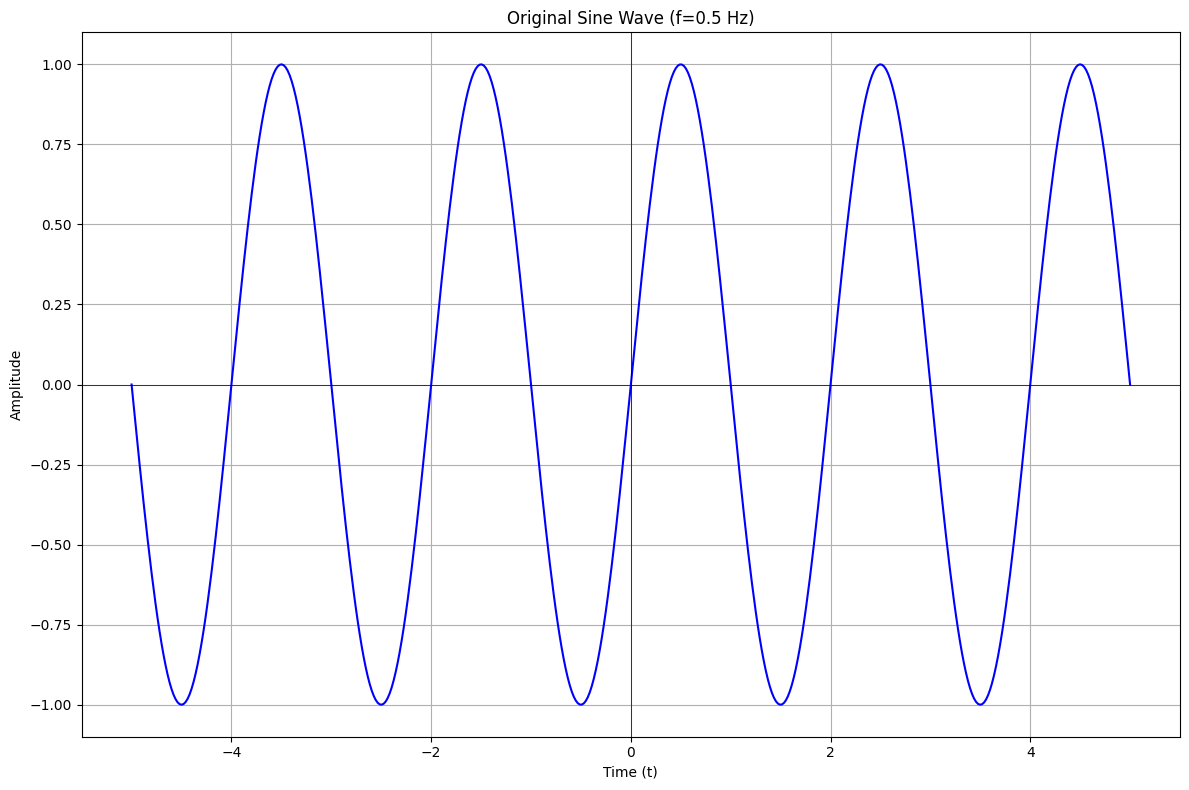

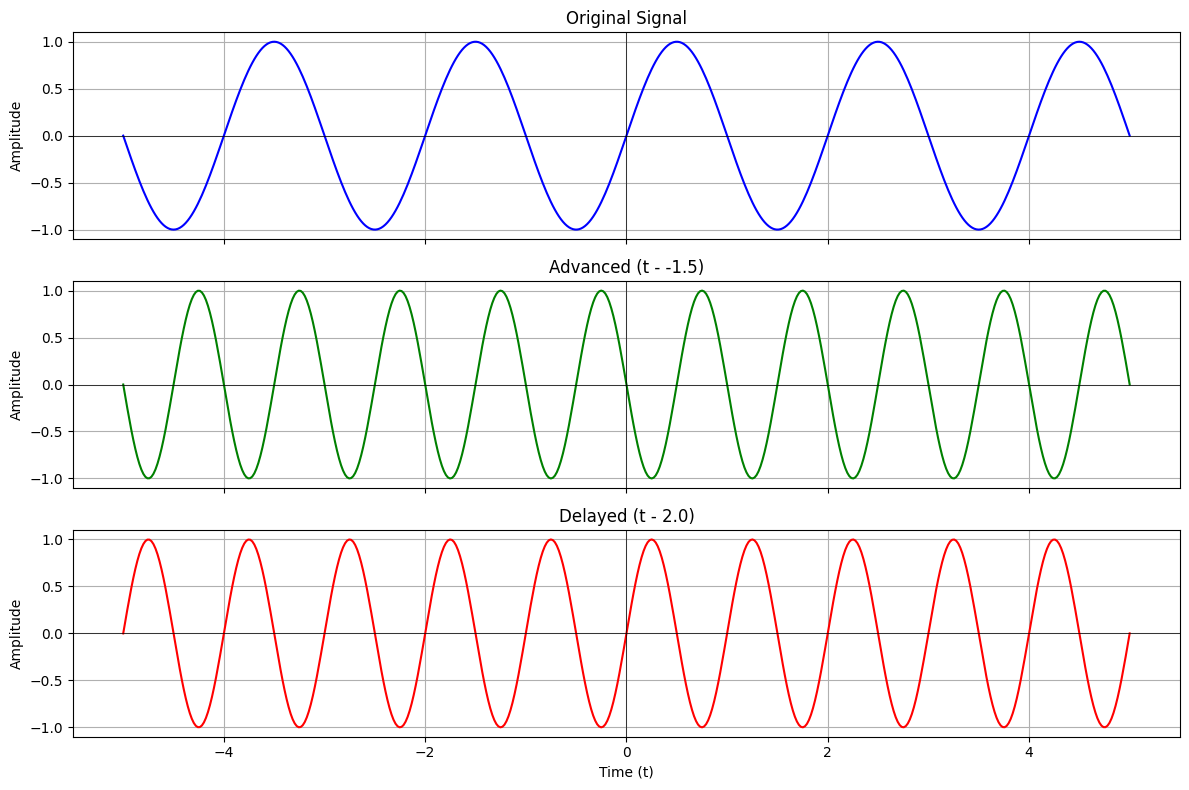

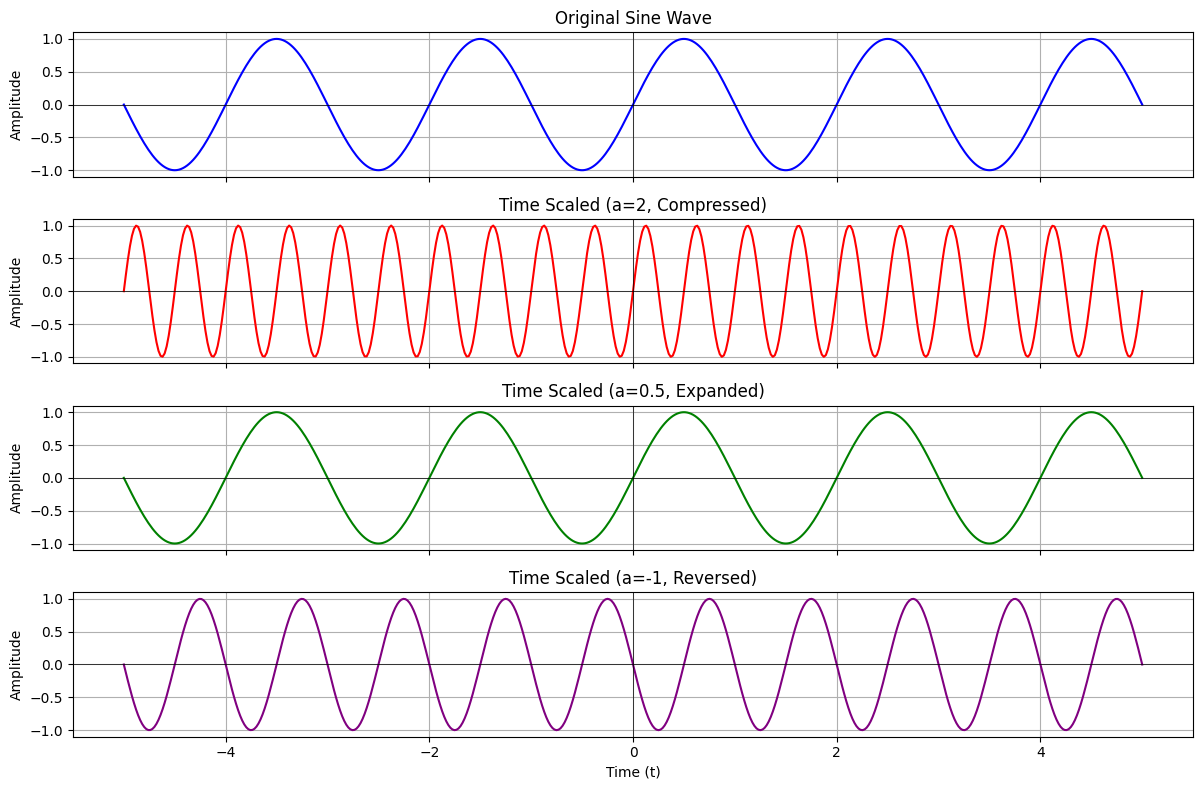

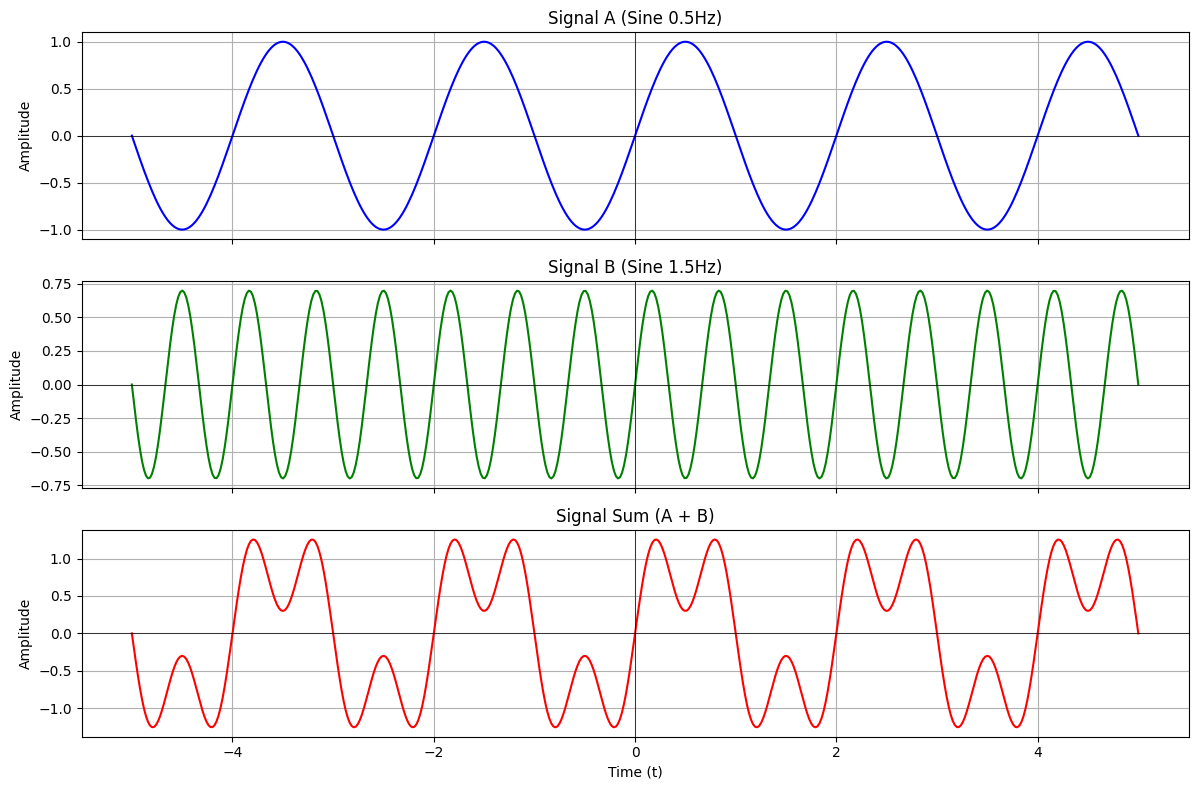

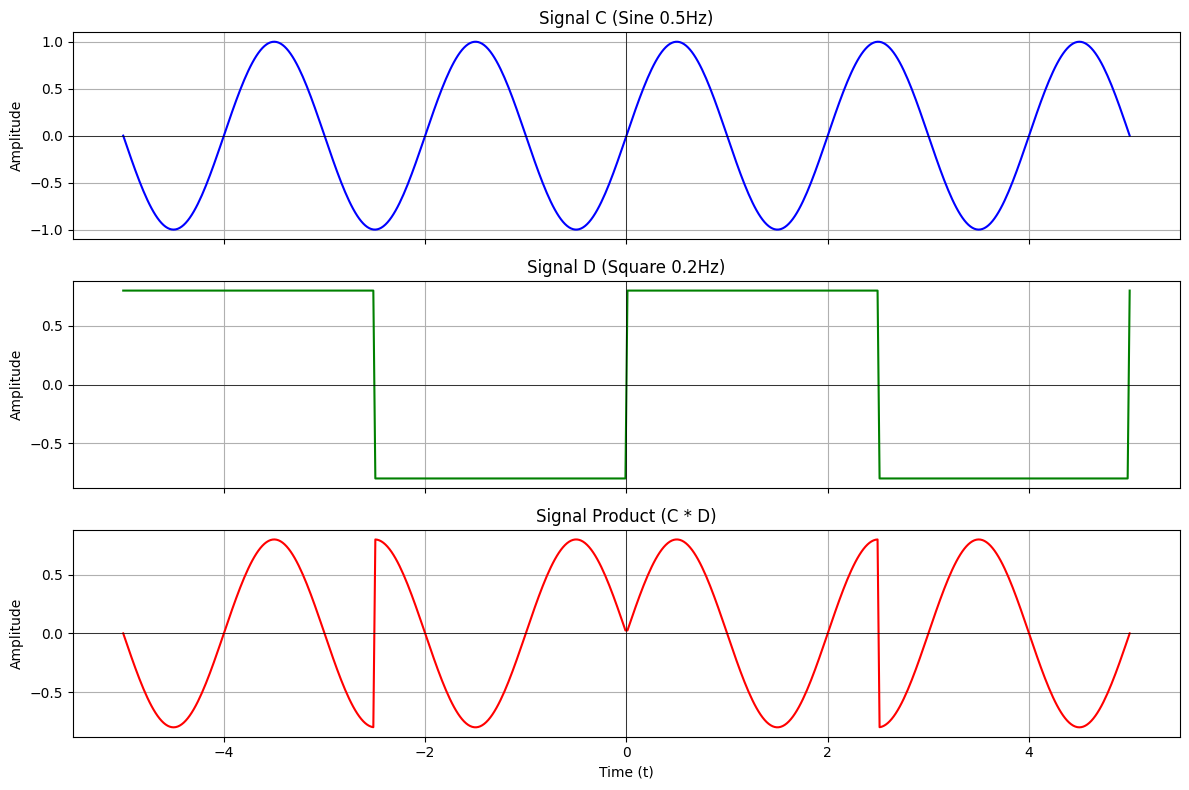

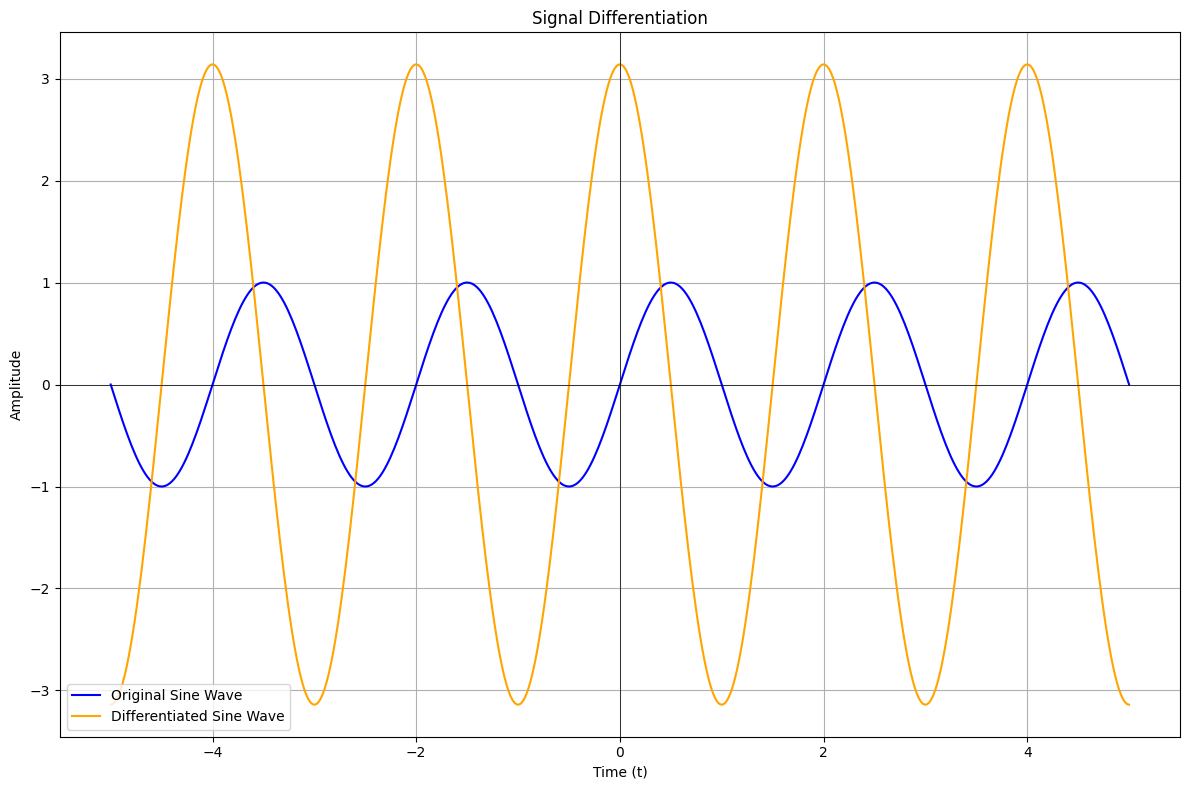

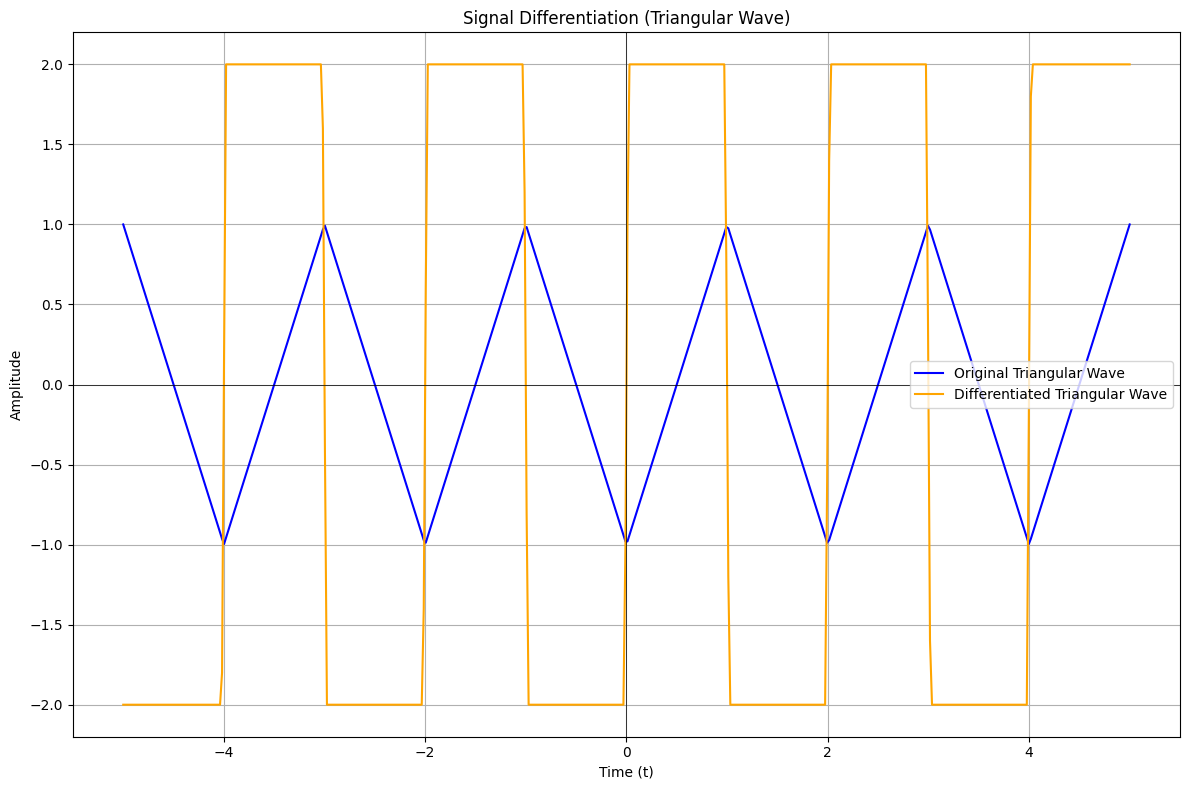

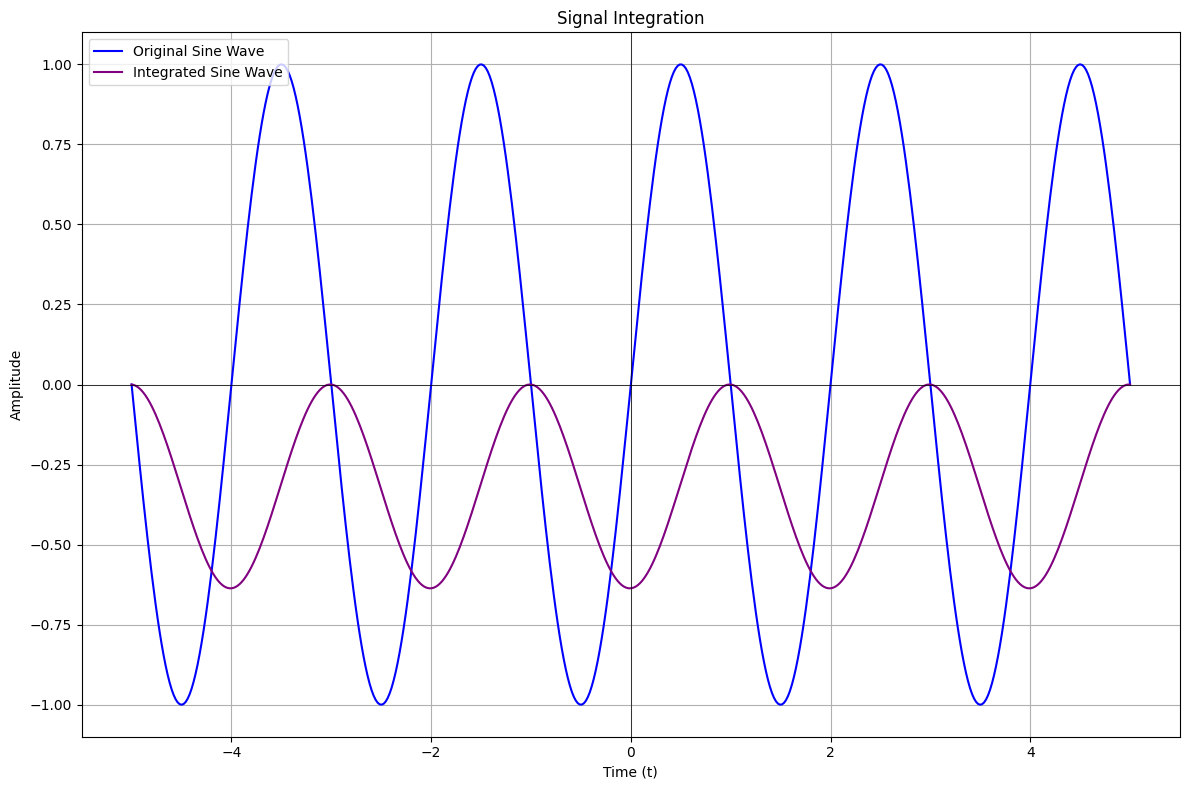

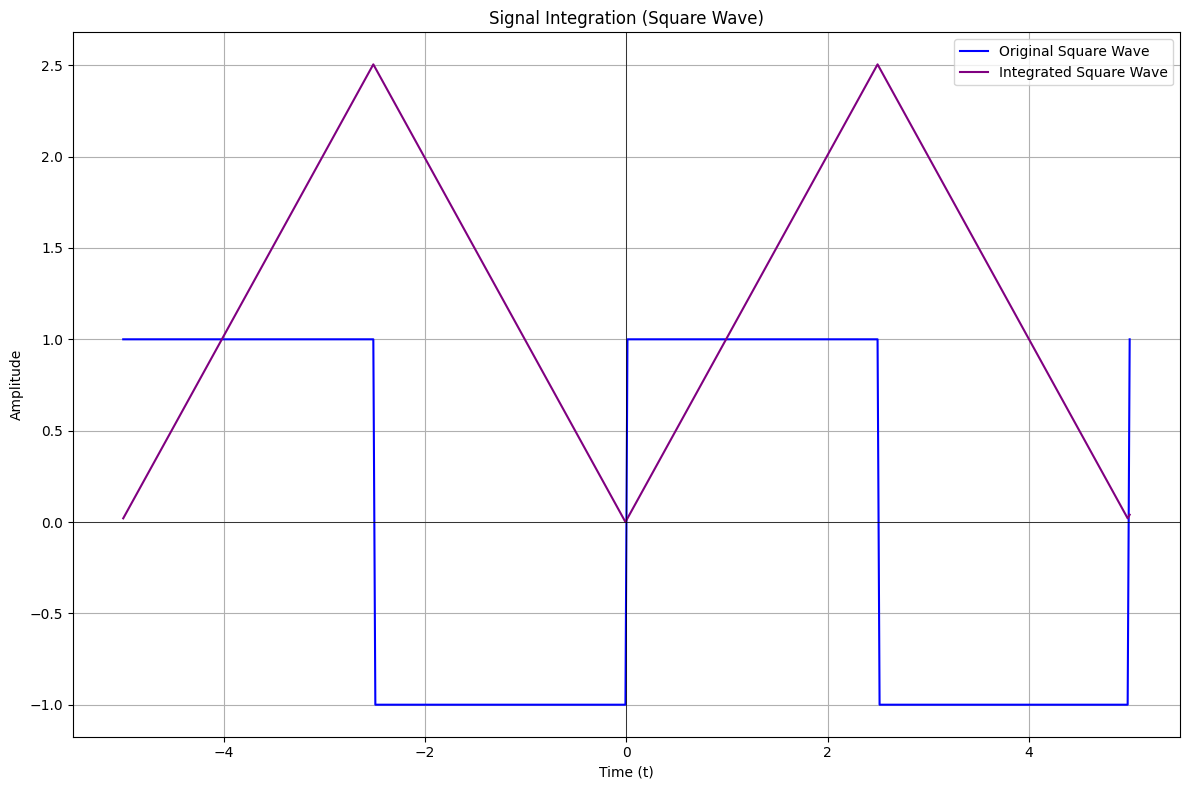

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Base Signals ---

def create_sine_wave(t, frequency=1, amplitude=1, phase=0):
    """Generates a sine wave."""
    return amplitude * np.sin(2 * np.pi * frequency * t + phase)

def create_square_wave(t, frequency=1, amplitude=1, duty_cycle=0.5):
    """Generates a square wave."""
    # Ensure the square wave is centered around 0 for better visualization of shifts
    return amplitude * (2 * (np.mod(t * frequency, 1) < duty_cycle).astype(float) - 1)

def create_triangular_wave(t, frequency=1, amplitude=1):
    """Generates a triangular wave."""
    return amplitude * (2 * np.abs(2 * (t * frequency - np.floor(t * frequency + 0.5))) - 1)

# --- 2. Signal Operations ---

def time_shift(signal_func, t_original, t0):
    """
    Applies a time shift to a signal.
    f_shifted(t) = f(t - t0)
    
    Args:
        signal_func (callable): The original signal function (e.g., create_sine_wave).
        t_original (np.array): The original time array.
        t0 (float): The amount of time to shift.
                    Positive t0 shifts the signal to the right (delay).
                    Negative t0 shifts the signal to the left (advance).
    
    Returns:
        np.array: The time-shifted signal.
    """
    return signal_func(t_original - t0)

def time_scale(signal_func, t_original, a):
    """
    Applies a time scaling to a signal.
    f_scaled(t) = f(a * t)
    
    Args:
        signal_func (callable): The original signal function.
        t_original (np.array): The original time array.
        a (float): The scaling factor.
                   If a > 1, the signal is compressed (appears faster).
                   If 0 < a < 1, the signal is expanded (appears slower).
                   If a < 0, the signal is reversed and scaled.
    
    Returns:
        np.array: The time-scaled signal.
    """
    return signal_func(a * t_original)

def signal_sum(signal1, signal2):
    """
    Computes the sum of two signals.
    Assumes signals are defined over the same time array.
    """
    if len(signal1) != len(signal2):
        raise ValueError("Signals must have the same length for summation.")
    return signal1 + signal2

def signal_product(signal1, signal2):
    """
    Computes the product of two signals.
    Assumes signals are defined over the same time array.
    """
    if len(signal1) != len(signal2):
        raise ValueError("Signals must have the same length for product.")
    return signal1 * signal2

def signal_differentiation(signal, t):
    """
    Numerically differentiates a signal using numpy's gradient.
    
    Args:
        signal (np.array): The signal values.
        t (np.array): The corresponding time array.
    
    Returns:
        np.array: The numerically differentiated signal.
    """
    return np.gradient(signal, t)

def signal_integration(signal, t):
    """
    Numerically integrates a signal using the trapezoidal rule (cumulative sum).
    
    Args:
        signal (np.array): The signal values.
        t (np.array): The corresponding time array.
    
    Returns:
        np.array: The numerically integrated signal (cumulative sum).
    """
    dt = t[1] - t[0]
    return np.cumsum(signal) * dt

# --- 3. Plotting Utility ---

def plot_signals(t, signals, titles, colors=None, y_labels=None, figsize=(12, 8), overlay_plots=False, main_title=None):
    """
    Plots multiple signals. Can plot on separate subplots or overlay on a single subplot.
    
    Args:
        t (np.array): The common time array.
        signals (list of np.array): A list of signal arrays to plot.
        titles (list of str): Titles for each subplot (or legend labels if overlay_plots is True).
        colors (list of str, optional): Colors for each signal. Defaults to None (matplotlib default).
        y_labels (list of str, optional): Y-axis labels for each subplot (or single subplot). Defaults to None.
        figsize (tuple): Figure size.
        overlay_plots (bool): If True, all signals are plotted on a single subplot.
                              If False (default), each signal gets its own subplot.
        main_title (str, optional): A main title for the figure when overlay_plots is True.
    """
    if overlay_plots:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        if main_title:
            ax.set_title(main_title)
        if colors is None:
            colors = plt.cm.viridis(np.linspace(0, 1, len(signals))) # Use a colormap for distinct lines
        
        for i, signal in enumerate(signals):
            ax.plot(t, signal, color=colors[i], label=titles[i])
        
        ax.set_xlabel("Time (t)")
        if y_labels and len(y_labels) > 0:
            ax.set_ylabel(y_labels[0]) # Use the first y_label for the single y-axis
        else:
            ax.set_ylabel("Amplitude")
        ax.grid(True)
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)
        ax.legend()
    else:
        num_plots = len(signals)
        fig, axes = plt.subplots(num_plots, 1, figsize=figsize, sharex=True)

        # Ensure axes is an array even for a single plot
        if num_plots == 1:
            axes = [axes]

        if colors is None:
            colors = ['blue'] * num_plots
        if y_labels is None:
            y_labels = ['Amplitude'] * num_plots

        for i in range(num_plots):
            axes[i].plot(t, signals[i], color=colors[i])
            axes[i].set_title(titles[i])
            axes[i].set_ylabel(y_labels[i])
            axes[i].grid(True)
            axes[i].axhline(0, color='black', linewidth=0.5)
            axes[i].axvline(0, color='black', linewidth=0.5)

        axes[-1].set_xlabel("Time (t)")
    plt.tight_layout()
    plt.show()

# --- 4. Demonstration ---

# Define a common time array
t = np.linspace(-5, 5, 500) # Time from -5 to 5 seconds with 500 points

print("--- Demonstrating Signal Operations ---")

# --- Original Signal ---
original_sine = create_sine_wave(t, frequency=0.5)
plot_signals(t, [original_sine], ["Original Sine Wave (f=0.5 Hz)"])

# --- 1. Time Shift ---
t0_advance = -1.5 # Shift left (advance) by 1.5 seconds
t0_delay = 2.0    # Shift right (delay) by 2.0 seconds

advanced_sine = time_shift(create_sine_wave, t, t0_advance)
delayed_sine = time_shift(create_sine_wave, t, t0_delay)

# Plotting time shift signals separately as requested
plot_signals(t, [original_sine, advanced_sine, delayed_sine],
             ["Original Signal", f"Advanced (t - {t0_advance})", f"Delayed (t - {t0_delay})"],
             colors=['blue', 'green', 'red'],
             overlay_plots=False) # Changed to False for separate plots


# --- 2. Time Scaling ---
a_compress = 2   # Compress by factor of 2
a_expand = 0.5   # Expand by factor of 0.5
a_reverse = -1   # Reverse

scaled_sine_compress = time_scale(create_sine_wave, t, a_compress)
scaled_sine_expand = time_scale(create_sine_wave, t, a_expand)
scaled_sine_reverse = time_scale(create_sine_wave, t, a_reverse)

# Plotting time scaling signals separately as requested
plot_signals(t, [original_sine, scaled_sine_compress, scaled_sine_expand, scaled_sine_reverse],
             ["Original Sine Wave", "Time Scaled (a=2, Compressed)", "Time Scaled (a=0.5, Expanded)", "Time Scaled (a=-1, Reversed)"],
             colors=['blue', 'red', 'green', 'purple'],
             overlay_plots=False) # Explicitly set to False for separate plots


# --- 3. Signal Sum ---
signal_A = create_sine_wave(t, frequency=0.5, amplitude=1)
signal_B = create_sine_wave(t, frequency=1.5, amplitude=0.7)
sum_signal = signal_sum(signal_A, signal_B)

plot_signals(t, [signal_A, signal_B, sum_signal],
             ["Signal A (Sine 0.5Hz)", "Signal B (Sine 1.5Hz)", "Signal Sum (A + B)"],
             colors=['blue', 'green', 'red'],
             y_labels=['Amplitude', 'Amplitude', 'Amplitude'])

# --- 4. Signal Product ---
signal_C = create_sine_wave(t, frequency=0.5, amplitude=1)
signal_D = create_square_wave(t, frequency=0.2, amplitude=0.8)
product_signal = signal_product(signal_C, signal_D)

plot_signals(t, [signal_C, signal_D, product_signal],
             ["Signal C (Sine 0.5Hz)", "Signal D (Square 0.2Hz)", "Signal Product (C * D)"],
             colors=['blue', 'green', 'red'],
             y_labels=['Amplitude', 'Amplitude', 'Amplitude'])

# --- 5. Differentiation ---
# Using a sine wave for differentiation (derivative is cosine)
diff_sine = signal_differentiation(original_sine, t)

plot_signals(t, [original_sine, diff_sine],
             ["Original Sine Wave", "Differentiated Sine Wave"],
             colors=['blue', 'orange'],
             y_labels=['Amplitude', 'd(Amplitude)/dt'],
             overlay_plots=True,
             main_title="Signal Differentiation")

# Using a triangular wave for differentiation (derivative is square wave)
original_triangular = create_triangular_wave(t, frequency=0.5, amplitude=1)
diff_triangular = signal_differentiation(original_triangular, t)

plot_signals(t, [original_triangular, diff_triangular],
             ["Original Triangular Wave", "Differentiated Triangular Wave"],
             colors=['blue', 'orange'],
             y_labels=['Amplitude', 'd(Amplitude)/dt'],
             overlay_plots=True,
             main_title="Signal Differentiation (Triangular Wave)")

# --- 6. Integration ---
# Integrating a sine wave (integral is negative cosine)
int_sine = signal_integration(original_sine, t)

plot_signals(t, [original_sine, int_sine],
             ["Original Sine Wave", "Integrated Sine Wave"],
             colors=['blue', 'purple'],
             y_labels=['Amplitude', 'Cumulative Integral'],
             overlay_plots=True,
             main_title="Signal Integration")

# Integrating a square wave (integral is triangular wave)
original_square = create_square_wave(t, frequency=0.2, amplitude=1)
int_square = signal_integration(original_square, t)

plot_signals(t, [original_square, int_square],
             ["Original Square Wave", "Integrated Square Wave"],
             colors=['blue', 'purple'],
             y_labels=['Amplitude', 'Cumulative Integral'],
             overlay_plots=True,
             main_title="Signal Integration (Square Wave)")


DFT Property Area visualization for rect signal

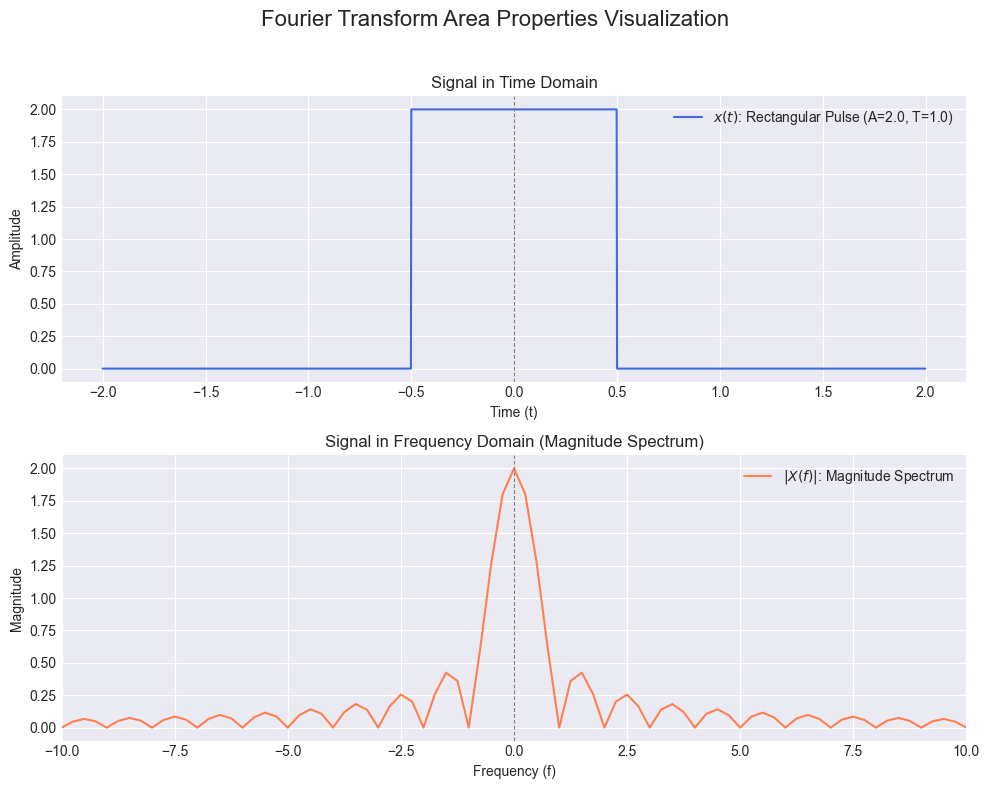

--- Property 1: X(0) = integral(x(t) dt) ---
Numerical area under x(t) (integral x(t) dt): 2.0000
Analytical area under x(t) for rect pulse:   2.0000
Value of X(f) at f=0 (X(0)), numerical:      2.0000 (real part)

--- Property 2: x(0) = integral(X(f) df) ---
Numerical area under X(f) (integral X(f) df): 0.0000 (real part)
Analytical value of x(0) for rect pulse:    2.0000
Value of x(t) at t=0 (x(0)), from signal:   2.0000

Notes on Numerical Approximations:
- The FFT computes the Discrete Fourier Transform (DFT).
- Scaling by 'dt' for X(f) and 'df' for areas helps approximate the continuous Fourier Transform integrals.
- Results are numerical approximations; exact equality might not be achieved due to discretization and finite signal length.
- For X(0), we use the DC component of the FFT (freq[0]).
- For x(0), we directly sample the defined time-domain signal at or near t=0.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Signal Parameters and Time Domain Signal x(t) ---
# Rectangular pulse parameters
A = 2.0  # Amplitude of the pulse
T_pulse = 1.0  # Duration of the pulse (centered at 0)

# Time domain parameters
Fs_time = 500  # Sampling frequency for time domain representation (higher for better approximation)
t_max = 2.0 * T_pulse # Max time for visualization (ensure pulse is fully captured)
dt = 1.0 / Fs_time # Time step
t = np.arange(-t_max, t_max, dt) # Time vector

# Define the rectangular pulse x(t)
# x(t) = A for -T_pulse/2 <= t <= T_pulse/2, and 0 otherwise
x_t = np.zeros_like(t)
x_t[(t >= -T_pulse / 2) & (t <= T_pulse / 2)] = A

# --- 2. Compute Numerical Fourier Transform X(f) ---
# Perform FFT
# For a better approximation of the continuous FT, the result of FFT should be scaled by dt
# The FFT computes X_k = sum(x_n * exp(-j*2*pi*k*n/N)).
# The continuous FT is X(f) = integral(x(t) * exp(-j*2*pi*f*t) dt).
# So, X(f_k) approx sum(x(t_n) * exp(-j*2*pi*f_k*t_n) * dt) = dt * FFT(x_t)[k]
X_f_complex = np.fft.fft(x_t) * dt

# Create frequency vector
N_time = len(t) # Number of time samples
# np.fft.fftfreq generates frequencies in the order: 0, +ve freqs, -ve freqs (Nyquist if N is even)
# The frequency resolution df = Fs_time / N_time = 1 / (N_time * dt)
freq = np.fft.fftfreq(N_time, d=dt)

# Shift the zero-frequency component to the center for plotting
X_f_complex_shifted = np.fft.fftshift(X_f_complex)
freq_shifted = np.fft.fftshift(freq)

# Magnitude of the spectrum
X_f_magnitude_shifted = np.abs(X_f_complex_shifted)

# --- 3. Visualization ---
plt.style.use('seaborn-v0_8-darkgrid') # Using a seaborn style for better aesthetics
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Fourier Transform Area Properties Visualization', fontsize=16)

# Plot x(t)
axs[0].plot(t, x_t, label=f'$x(t)$: Rectangular Pulse (A={A}, T={T_pulse})', color='royalblue')
axs[0].set_xlabel('Time (t)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Signal in Time Domain')
axs[0].grid(True)
axs[0].legend()
axs[0].axvline(0, color='gray', linestyle='--', linewidth=0.8) # Mark t=0

# Plot |X(f)|
axs[1].plot(freq_shifted, X_f_magnitude_shifted, label='$|X(f)|$: Magnitude Spectrum', color='coral')
axs[1].set_xlabel('Frequency (f)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('Signal in Frequency Domain (Magnitude Spectrum)')
axs[1].grid(True)
axs[1].legend()
axs[1].set_xlim([-10/T_pulse, 10/T_pulse]) # Limit x-axis for better view of main lobe
axs[1].axvline(0, color='gray', linestyle='--', linewidth=0.8) # Mark f=0

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap
plt.show()

# --- 4. Verify Property 1: X(0) = integral(x(t) dt) ---
# Numerical integration of x(t)
area_x_t_numerical = np.sum(x_t) * dt
# Analytical area for the rectangular pulse
area_x_t_analytical = A * T_pulse

# Value of X(f) at f=0
# Find the index corresponding to f=0 in the unshifted frequency array
# freq[0] is always 0 for np.fft.fftfreq
X_at_0_numerical = X_f_complex[0] # DC component from unshifted FFT result

print("--- Property 1: X(0) = integral(x(t) dt) ---")
print(f"Numerical area under x(t) (integral x(t) dt): {area_x_t_numerical:.4f}")
print(f"Analytical area under x(t) for rect pulse:   {area_x_t_analytical:.4f}")
print(f"Value of X(f) at f=0 (X(0)), numerical:      {np.real(X_at_0_numerical):.4f} (real part)")
# For a real and symmetric x(t) like our pulse, X(0) should be real.
# Small imaginary parts can occur due to numerical precision.

# --- 5. Verify Property 2: x(0) = integral(X(f) df) ---
# Numerical integration of X(f)
# df is the frequency step: df = freq_shifted[1] - freq_shifted[0] (for evenly spaced freqs)
# or df = 1 / (N_time * dt)
df = freq_shifted[1] - freq_shifted[0] # More robust way to get df after shifting
area_X_f_numerical = np.sum(X_f_complex_shifted) * df # Summing complex values, then take real part
# Analytical value of x(0) for the rectangular pulse
x_at_0_analytical = A

# Value of x(t) at t=0
# Find the index corresponding to t=0
# We constructed t such that 0 is likely very close to a sample or is a sample
t0_index = np.argmin(np.abs(t - 0))
x_at_0_numerical = x_t[t0_index]

print("\n--- Property 2: x(0) = integral(X(f) df) ---")
print(f"Numerical area under X(f) (integral X(f) df): {np.real(area_X_f_numerical):.4f} (real part)")
print(f"Analytical value of x(0) for rect pulse:    {x_at_0_analytical:.4f}")
print(f"Value of x(t) at t=0 (x(0)), from signal:   {x_at_0_numerical:.4f}")
# For a real x(t), integral(X(f)df) should be real.

print("\nNotes on Numerical Approximations:")
print("- The FFT computes the Discrete Fourier Transform (DFT).")
print("- Scaling by 'dt' for X(f) and 'df' for areas helps approximate the continuous Fourier Transform integrals.")
print("- Results are numerical approximations; exact equality might not be achieved due to discretization and finite signal length.")
print("- For X(0), we use the DC component of the FFT (freq[0]).")
print("- For x(0), we directly sample the defined time-domain signal at or near t=0.")



<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Alessio\AppData\Local\Temp\ipykernel_4260\1746977079.py:42: SyntaxWarning: invalid escape sequence '\s'
  axs[0].plot(t, x_t, label=f'$x(t)$: Gaussian Pulse (A={A_gauss}, $\sigma$={sigma_gauss})', color='darkgreen')


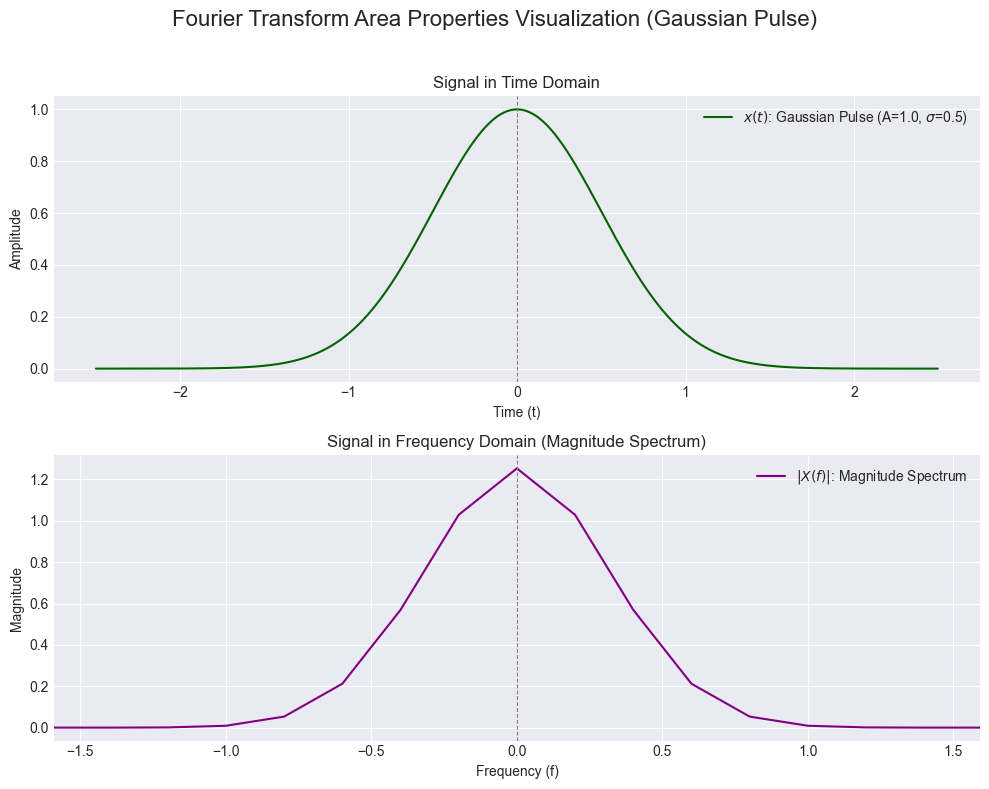

--- Property 1: X(0) = integral(x(t) dt) ---
Numerical area under x(t) (integral x(t) dt): 1.2533
Analytical area under x(t) for Gaussian:    1.2533
Value of X(f) at f=0 (X(0)), numerical:      1.2533 (real part)

--- Property 2: x(0) = integral(X(f) df) ---
Numerical area under X(f) (integral X(f) df): 0.0000 (real part)
Analytical value of x(0) for Gaussian:    1.0000
Value of x(t) at t=0 (x(0)), from signal:   1.0000

Notes on Numerical Approximations:
- The FFT computes the Discrete Fourier Transform (DFT).
- Scaling by 'dt' for X(f) and 'df' for areas helps approximate the continuous Fourier Transform integrals.
- Results are numerical approximations; exact equality might not be achieved due to discretization and finite signal length.
- For X(0), we use the DC component of the FFT (freq[0]).
- For x(0), we directly sample the defined time-domain signal at or near t=0.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Signal Parameters and Time Domain Signal x(t) ---
# Gaussian pulse parameters
A_gauss = 1.0  # Amplitude of the Gaussian pulse at its peak (t=0)
sigma_gauss = 0.5  # Standard deviation of the Gaussian pulse (controls its width)

# Time domain parameters
Fs_time = 500  # Sampling frequency for time domain representation
# For a Gaussian, we need to ensure the time window captures most of its energy.
# Typically, +/- 4 to 5 sigmas is sufficient.
t_max = 5 * sigma_gauss
dt = 1.0 / Fs_time # Time step
t = np.arange(-t_max, t_max, dt) # Time vector

# Define the Gaussian pulse x(t)
# x(t) = A * exp(-t^2 / (2 * sigma^2))
x_t = A_gauss * np.exp(-t**2 / (2 * sigma_gauss**2))

# --- 2. Compute Numerical Fourier Transform X(f) ---
# Perform FFT
X_f_complex = np.fft.fft(x_t) * dt

# Create frequency vector
N_time = len(t) # Number of time samples
freq = np.fft.fftfreq(N_time, d=dt)

# Shift the zero-frequency component to the center for plotting
X_f_complex_shifted = np.fft.fftshift(X_f_complex)
freq_shifted = np.fft.fftshift(freq)

# Magnitude of the spectrum
X_f_magnitude_shifted = np.abs(X_f_complex_shifted)

# --- 3. Visualization ---
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Fourier Transform Area Properties Visualization (Gaussian Pulse)', fontsize=16)

# Plot x(t)
axs[0].plot(t, x_t, label=f'$x(t)$: Gaussian Pulse (A={A_gauss}, $\sigma$={sigma_gauss})', color='darkgreen')
axs[0].set_xlabel('Time (t)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Signal in Time Domain')
axs[0].grid(True)
axs[0].legend()
axs[0].axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Plot |X(f)|
# The FT of A*exp(-t^2/(2*sigma_t^2)) is A*sigma_t*sqrt(2*pi) * exp(- (2*pi*sigma_t*f)^2 / 2)
# So the frequency domain Gaussian also has a sigma: sigma_f = 1 / (2*pi*sigma_t)
sigma_f = 1 / (2 * np.pi * sigma_gauss)
axs[1].plot(freq_shifted, X_f_magnitude_shifted, label='$|X(f)|$: Magnitude Spectrum', color='purple')
axs[1].set_xlabel('Frequency (f)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('Signal in Frequency Domain (Magnitude Spectrum)')
axs[1].grid(True)
axs[1].legend()
axs[1].set_xlim([-5*sigma_f, 5*sigma_f]) # Limit x-axis based on frequency domain sigma
axs[1].axvline(0, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- 4. Verify Property 1: X(0) = integral(x(t) dt) ---
# Numerical integration of x(t)
area_x_t_numerical = np.sum(x_t) * dt
# Analytical area for the Gaussian pulse A*exp(-t^2/(2*sigma^2)) is A * sigma * sqrt(2*pi)
area_x_t_analytical = A_gauss * sigma_gauss * np.sqrt(2 * np.pi)

# Value of X(f) at f=0
X_at_0_numerical = X_f_complex[0]

print("--- Property 1: X(0) = integral(x(t) dt) ---")
print(f"Numerical area under x(t) (integral x(t) dt): {area_x_t_numerical:.4f}")
print(f"Analytical area under x(t) for Gaussian:    {area_x_t_analytical:.4f}")
print(f"Value of X(f) at f=0 (X(0)), numerical:      {np.real(X_at_0_numerical):.4f} (real part)")

# --- 5. Verify Property 2: x(0) = integral(X(f) df) ---
# Numerical integration of X(f)
df = freq_shifted[1] - freq_shifted[0]
area_X_f_numerical = np.sum(X_f_complex_shifted) * df
# Analytical value of x(0) for the Gaussian pulse
x_at_0_analytical = A_gauss # By definition, peak is at t=0

# Value of x(t) at t=0
t0_index = np.argmin(np.abs(t - 0))
x_at_0_numerical = x_t[t0_index]

print("\n--- Property 2: x(0) = integral(X(f) df) ---")
print(f"Numerical area under X(f) (integral X(f) df): {np.real(area_X_f_numerical):.4f} (real part)")
print(f"Analytical value of x(0) for Gaussian:    {x_at_0_analytical:.4f}")
print(f"Value of x(t) at t=0 (x(0)), from signal:   {x_at_0_numerical:.4f}")

print("\nNotes on Numerical Approximations:")
print("- The FFT computes the Discrete Fourier Transform (DFT).")
print("- Scaling by 'dt' for X(f) and 'df' for areas helps approximate the continuous Fourier Transform integrals.")
print("- Results are numerical approximations; exact equality might not be achieved due to discretization and finite signal length.")
print("- For X(0), we use the DC component of the FFT (freq[0]).")
print("- For x(0), we directly sample the defined time-domain signal at or near t=0.")



Visualization for complex signal

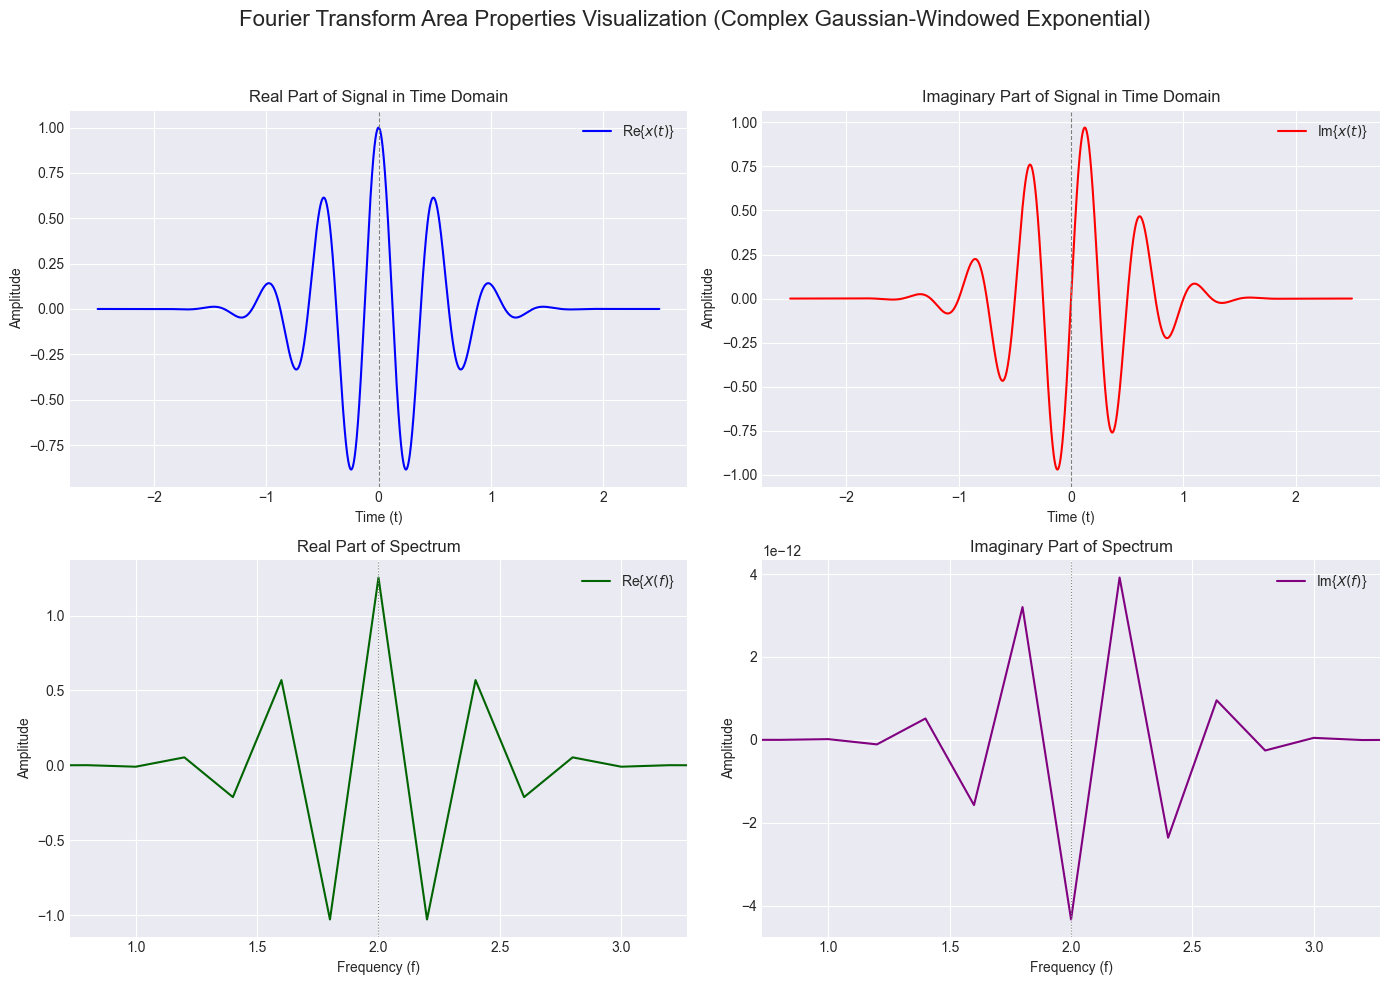

--- Property 1: X(0) = integral(x(t) dt) ---
Numerical integral x(t) dt: -0.0000 + 0.0000j
Analytical integral x(t) dt (is X(0) for this signal): 0.0000 + 0.0000j
Value of X(f) at f=0 from FFT:  -0.0000 + 0.0000j

--- Property 2: x(0) = integral(X(f) df) ---
Numerical integral X(f) df: 0.0000 + 0.0000j
Analytical value of x(0):    1.0000 + 0.0000j
Value of x(t) at t=0 from signal:   1.0000 + -0.0000j

Notes on Numerical Approximations for Complex Signals:
- The properties hold for complex signals as well.
- Integrals and values at origins can be complex numbers.
- FFT computes the DFT. Scaling by 'dt' for X(f) and 'df' for areas approximates continuous FT integrals.
- Results are numerical; exact equality might not be seen due to discretization and finite signal/spectrum extent.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Signal Parameters and Time Domain Signal x(t) ---
# Gaussian-windowed complex exponential: x(t) = A * exp(j*2*pi*f_c*t) * exp(-t^2 / (2*sigma^2))
A_complex = 1.0  # Amplitude
f_carrier = 2.0  # Carrier frequency in Hz for the complex exponential
sigma_gauss = 0.5  # Standard deviation of the Gaussian window

# Time domain parameters
Fs_time = 1000  # Sampling frequency (increased for better resolution of higher freq component)
# For a Gaussian window, ensure the time window captures most of its energy.
t_max = 5 * sigma_gauss # Max time for visualization
dt = 1.0 / Fs_time # Time step
t = np.arange(-t_max, t_max, dt) # Time vector

# Define the complex signal x(t)
x_t_complex = A_complex * np.exp(1j * 2 * np.pi * f_carrier * t) * np.exp(-t**2 / (2 * sigma_gauss**2))

# --- 2. Compute Numerical Fourier Transform X(f) ---
# Perform FFT
# Scaling by dt approximates the continuous Fourier Transform integral
X_f_complex = np.fft.fft(x_t_complex) * dt

# Create frequency vector
N_time = len(t) # Number of time samples
freq = np.fft.fftfreq(N_time, d=dt)

# Shift the zero-frequency component to the center for plotting
X_f_complex_shifted = np.fft.fftshift(X_f_complex)
freq_shifted = np.fft.fftshift(freq)

# --- 3. Visualization ---
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(14, 10)) # Now 2x2 for Re/Im parts
fig.suptitle('Fourier Transform Area Properties Visualization (Complex Gaussian-Windowed Exponential)', fontsize=16)

# Plot Real part of x(t)
axs[0,0].plot(t, np.real(x_t_complex), label='Re{$x(t)$}', color='blue')
axs[0,0].set_xlabel('Time (t)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_title('Real Part of Signal in Time Domain')
axs[0,0].grid(True)
axs[0,0].legend()
axs[0,0].axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Plot Imaginary part of x(t)
axs[0,1].plot(t, np.imag(x_t_complex), label='Im{$x(t)$}', color='red')
axs[0,1].set_xlabel('Time (t)')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_title('Imaginary Part of Signal in Time Domain')
axs[0,1].grid(True)
axs[0,1].legend()
axs[0,1].axvline(0, color='gray', linestyle='--', linewidth=0.8)


# Plot Real part of X(f)
axs[1,0].plot(freq_shifted, np.real(X_f_complex_shifted), label='Re{$X(f)$}', color='darkgreen')
axs[1,0].set_xlabel('Frequency (f)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_title('Real Part of Spectrum')
axs[1,0].grid(True)
axs[1,0].legend()
# Limit x-axis for better view: FT of Gaussian-windowed complex exp is a shifted Gaussian
# The peak of X(f) will be at f_carrier
sigma_f_domain = 1 / (2 * np.pi * sigma_gauss) # Sigma of the Gaussian envelope in freq domain
axs[1,0].set_xlim([f_carrier - 4*sigma_f_domain, f_carrier + 4*sigma_f_domain])
axs[1,0].axvline(0, color='lightgray', linestyle='--', linewidth=0.8) # Mark f=0
axs[1,0].axvline(f_carrier, color='gray', linestyle=':', linewidth=0.8) # Mark carrier freq

# Plot Imaginary part of X(f)
axs[1,1].plot(freq_shifted, np.imag(X_f_complex_shifted), label='Im{$X(f)$}', color='purple')
axs[1,1].set_xlabel('Frequency (f)')
axs[1,1].set_ylabel('Amplitude')
axs[1,1].set_title('Imaginary Part of Spectrum')
axs[1,1].grid(True)
axs[1,1].legend()
axs[1,1].set_xlim([f_carrier - 4*sigma_f_domain, f_carrier + 4*sigma_f_domain])
axs[1,1].axvline(0, color='lightgray', linestyle='--', linewidth=0.8) # Mark f=0
axs[1,1].axvline(f_carrier, color='gray', linestyle=':', linewidth=0.8) # Mark carrier freq


plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout
plt.show()

# --- 4. Verify Property 1: X(0) = integral(x(t) dt) ---
# Numerical integration of x(t) (complex)
area_x_t_numerical_complex = np.sum(x_t_complex) * dt

# Analytical area for x(t) = A * exp(j*2*pi*f_c*t) * exp(-t^2 / (2*sigma^2))
# Integral is A * sigma * sqrt(2*pi) * exp(-(2*pi*f_c*sigma)^2 / 2)
# This is the FT of A*exp(-t^2/(2*sigma^2)) evaluated at -f_c, or FT of A*exp(j*2*pi*f_c*t) convolved with FT of Gaussian
# More simply, X(f) = FT{x(t)}. We need X(0).
# The FT of A*g(t)*exp(j*2*pi*f_c*t) is A*G(f-f_c) where G(f) = FT{g(t)}.
# Here g(t) = exp(-t^2/(2*sigma^2)). G(f) = sigma*sqrt(2*pi)*exp(-(2*pi*f*sigma)^2/2).
# So X(f) = A*sigma*sqrt(2*pi)*exp(-(2*pi*(f-f_c)*sigma)^2/2).
# X(0) = A*sigma*sqrt(2*pi)*exp(-(2*pi*(-f_c)*sigma)^2/2)
#      = A*sigma*sqrt(2*pi)*exp(-2*(pi*f_c*sigma)^2)
area_x_t_analytical_complex = A_complex * sigma_gauss * np.sqrt(2 * np.pi) * np.exp(-2 * (np.pi * f_carrier * sigma_gauss)**2)


# Value of X(f) at f=0 from numerical FFT
# freq[0] corresponds to f=0 in the unshifted FFT output
X_at_0_numerical_complex = X_f_complex[0]

print("--- Property 1: X(0) = integral(x(t) dt) ---")
print(f"Numerical integral x(t) dt: {area_x_t_numerical_complex.real:.4f} + {area_x_t_numerical_complex.imag:.4f}j")
print(f"Analytical integral x(t) dt (is X(0) for this signal): {area_x_t_analytical_complex.real:.4f} + {area_x_t_analytical_complex.imag:.4f}j")
print(f"Value of X(f) at f=0 from FFT:  {X_at_0_numerical_complex.real:.4f} + {X_at_0_numerical_complex.imag:.4f}j")
# For this specific complex signal, the analytical integral of x(t) is indeed X(0) of its own FT.

# --- 5. Verify Property 2: x(0) = integral(X(f) df) ---
# Numerical integration of X(f) (complex)
df = freq_shifted[1] - freq_shifted[0] # Frequency step
area_X_f_numerical_complex = np.sum(X_f_complex_shifted) * df

# Analytical value of x(0)
# x(0) = A_complex * exp(0) * exp(0) = A_complex
x_at_0_analytical_complex = A_complex + 0j # Ensure it's complex for comparison format

# Value of x(t) at t=0 from the defined signal
t0_index = np.argmin(np.abs(t - 0))
x_at_0_numerical_complex = x_t_complex[t0_index]

print("\n--- Property 2: x(0) = integral(X(f) df) ---")
print(f"Numerical integral X(f) df: {area_X_f_numerical_complex.real:.4f} + {area_X_f_numerical_complex.imag:.4f}j")
print(f"Analytical value of x(0):    {x_at_0_analytical_complex.real:.4f} + {x_at_0_analytical_complex.imag:.4f}j")
print(f"Value of x(t) at t=0 from signal:   {x_at_0_numerical_complex.real:.4f} + {x_at_0_numerical_complex.imag:.4f}j")

print("\nNotes on Numerical Approximations for Complex Signals:")
print("- The properties hold for complex signals as well.")
print("- Integrals and values at origins can be complex numbers.")
print("- FFT computes the DFT. Scaling by 'dt' for X(f) and 'df' for areas approximates continuous FT integrals.")
print("- Results are numerical; exact equality might not be seen due to discretization and finite signal/spectrum extent.")


Conjugate Symmetry property visualization

<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:81: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Alessio\AppData\Local\Temp\ipykernel_4260\384273759.py:81: SyntaxWarning: invalid escape sequence '\p'
  axs[2].set_yticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
C:\Users\Alessio\AppData\Local\Temp\ipykernel_4260\384273759.py:81: SyntaxWarning: invalid escape sequence '\p'
  axs[2].set_yticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
C:\Users\Alessio\AppData\Local\Temp\ipykernel_4260\384273759.py:81: SyntaxWarning: invalid escape sequence '\p'
  axs[2].set_yticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
C:\Users\Alessio\AppData\Local\Tem

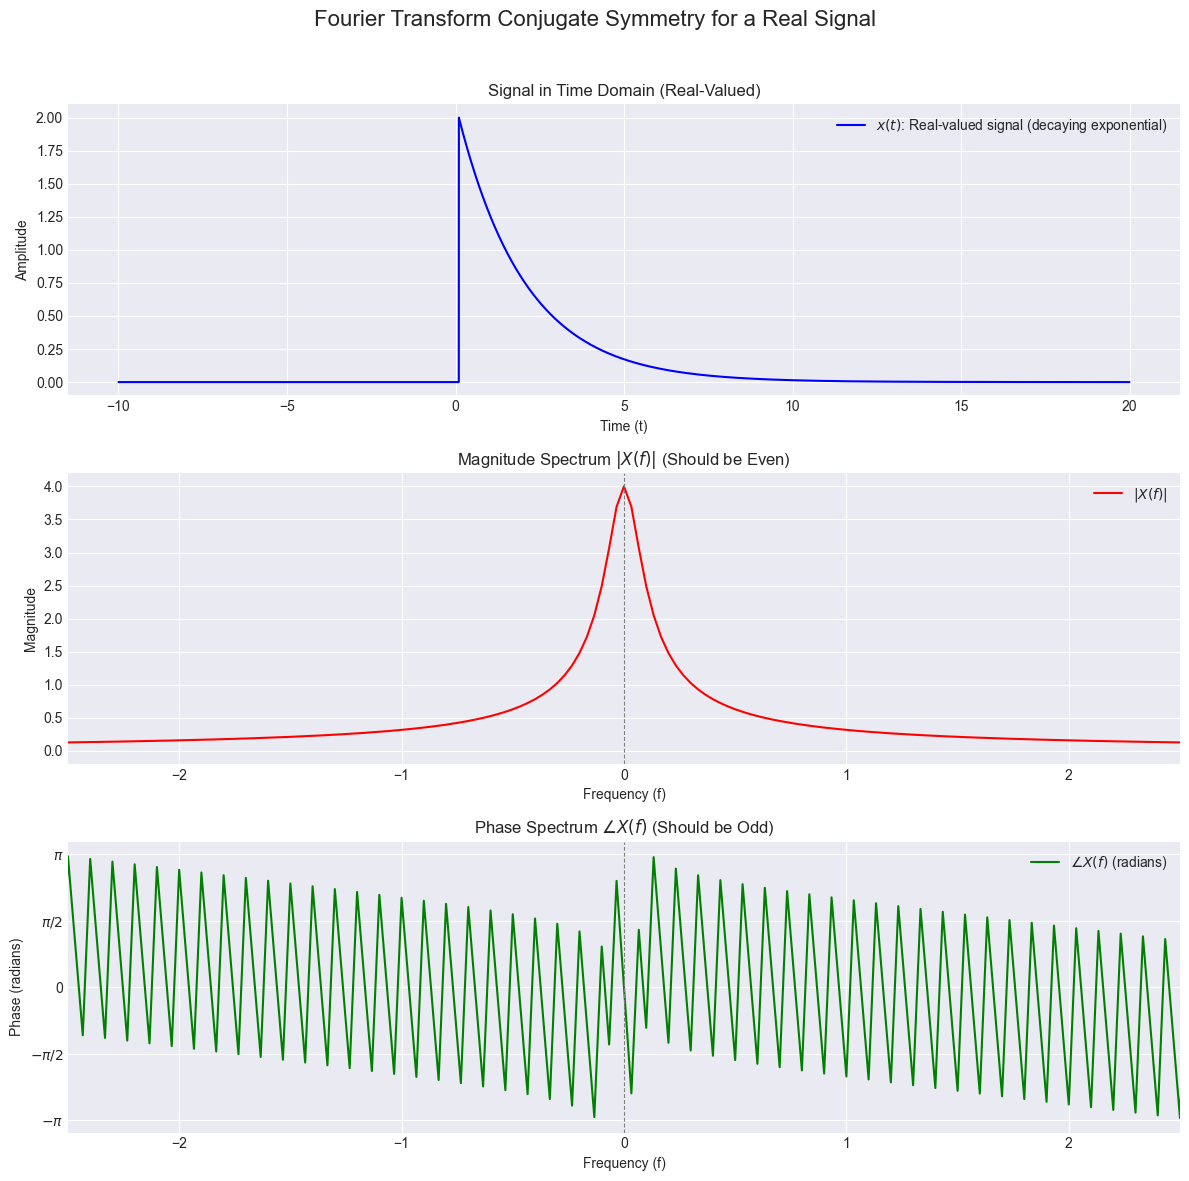

--- Numerical Verification of Conjugate Symmetry: X(-f) = X*(f) ---

Checking for f = 0.33 Hz (index 10):
  X(f)          = -0.8171 + 0.4428j
  X(-f)         = -0.8171 + -0.4428j (at f_neg = -0.33 Hz, index 14990)
  Conjugate(X(f))= -0.8171 + -0.4428j
  |X(f)|        = 0.9293
  |X(-f)|       = 0.9293 (Should be equal to |X(f)|)
  angle(X(f))   = 2.6450 radians
  angle(X(-f))  = -2.6450 radians (Should be -angle(X(f)))
  Phase anti-symmetry holds (approx.)

Checking for f = 0.67 Hz (index 20):
  X(f)          = 0.4621 + 0.1071j
  X(-f)         = 0.4621 + -0.1071j (at f_neg = -0.67 Hz, index 14980)
  Conjugate(X(f))= 0.4621 + -0.1071j
  |X(f)|        = 0.4743
  |X(-f)|       = 0.4743 (Should be equal to |X(f)|)
  angle(X(f))   = 0.2278 radians
  angle(X(-f))  = -0.2278 radians (Should be -angle(X(f)))
  Phase anti-symmetry holds (approx.)

Checking for f = 1.00 Hz (index 30):
  X(f)          = -0.1639 + -0.2718j
  X(-f)         = -0.1639 + 0.2718j (at f_neg = -1.00 Hz, index 14970)
  Con

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define a REAL-VALUED Time Domain Signal x(t) ---
# Example: A one-sided decaying exponential: x(t) = A * exp(-alpha*t) * u(t)
# where u(t) is the unit step function.
A_exp = 2.0  # Amplitude
alpha = 0.5  # Decay rate

# Time domain parameters
Fs_time = 500  # Sampling frequency
t_max = 10.0 / alpha # Max time for visualization (e.g., 5 time constants)
dt = 1.0 / Fs_time # Time step
t = np.arange(0, t_max, dt) # Time vector for t >= 0

# Define the decaying exponential signal x(t)
x_t = A_exp * np.exp(-alpha * t)
# For a more general case, we can define t from -t_max to t_max and apply u(t)
# but for this specific signal, starting t from 0 is simpler.
# If we wanted to show a signal not starting at 0, we'd need a more general t vector.
# Let's make it slightly more general by creating a full time vector and applying a step
t_full = np.arange(-t_max/2, t_max, dt) # Full time vector
x_t_full = np.zeros_like(t_full)
step_start_time = 0.1 # Let the exponential start slightly after t=0
x_t_full[t_full >= step_start_time] = A_exp * np.exp(-alpha * (t_full[t_full >= step_start_time] - step_start_time))


# --- 2. Compute Numerical Fourier Transform X(f) ---
# Perform FFT on the full signal
X_f_complex = np.fft.fft(x_t_full) * dt

# Create frequency vector
N_time = len(t_full)
freq = np.fft.fftfreq(N_time, d=dt)

# Shift the zero-frequency component to the center for plotting
X_f_complex_shifted = np.fft.fftshift(X_f_complex)
freq_shifted = np.fft.fftshift(freq)

# Magnitude of the spectrum
X_f_magnitude_shifted = np.abs(X_f_complex_shifted)
# Phase of the spectrum
X_f_phase_shifted = np.angle(X_f_complex_shifted) # radians

# --- 3. Visualization ---
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(3, 1, figsize=(12, 12))
fig.suptitle('Fourier Transform Conjugate Symmetry for a Real Signal', fontsize=16)

# Plot x(t)
axs[0].plot(t_full, x_t_full, label=f'$x(t)$: Real-valued signal (decaying exponential)', color='blue')
axs[0].set_xlabel('Time (t)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Signal in Time Domain (Real-Valued)')
axs[0].grid(True)
axs[0].legend()

# Plot Magnitude Spectrum |X(f)|
axs[1].plot(freq_shifted, X_f_magnitude_shifted, label='$|X(f)|$', color='red')
axs[1].set_xlabel('Frequency (f)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('Magnitude Spectrum $|X(f)|$ (Should be Even)')
axs[1].grid(True)
axs[1].legend()
axs[1].axvline(0, color='gray', linestyle='--', linewidth=0.8)
# Zoom in on relevant frequencies
freq_plot_limit = 5 * alpha # Heuristic limit based on decay
axs[1].set_xlim([-freq_plot_limit, freq_plot_limit])


# Plot Phase Spectrum angle(X(f))
axs[2].plot(freq_shifted, X_f_phase_shifted, label='$\\angle X(f)$ (radians)', color='green')
axs[2].set_xlabel('Frequency (f)')
axs[2].set_ylabel('Phase (radians)')
axs[2].set_title('Phase Spectrum $\\angle X(f)$ (Should be Odd)')
axs[2].grid(True)
axs[2].legend()
axs[2].axvline(0, color='gray', linestyle='--', linewidth=0.8)
axs[2].set_xlim([-freq_plot_limit, freq_plot_limit])
axs[2].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axs[2].set_yticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- 4. Numerical Verification of Conjugate Symmetry ---
print("--- Numerical Verification of Conjugate Symmetry: X(-f) = X*(f) ---")
# We need to compare X_f_complex at f and -f.
# The unshifted FFT output X_f_complex is ordered such that:
# X_f_complex[0] is X(0)
# X_f_complex[1:N_time//2] are positive frequencies
# X_f_complex[N_time//2:] are negative frequencies (starting from Nyquist if N_time is even)
# Specifically, X_f_complex[k] corresponds to freq[k]
# And X_f_complex[N_time - k] corresponds to -freq[k] for k = 1, 2, ... (N_time//2 -1)

# Let's pick a few positive frequency indices and check their negative counterparts
indices_to_check = [10, 20, 30, int(N_time*0.1)] # Example indices for positive frequencies

for k_pos_idx in indices_to_check:
    if k_pos_idx == 0 or k_pos_idx >= N_time // 2: # Skip DC or frequencies beyond positive range
        continue

    f_val = freq[k_pos_idx]
    X_at_f = X_f_complex[k_pos_idx]

    # Find corresponding negative frequency index
    # For freq[k_pos_idx], the negative is freq[N_time - k_pos_idx]
    k_neg_idx = N_time - k_pos_idx
    f_neg_val = freq[k_neg_idx] # Should be approximately -f_val
    X_at_neg_f = X_f_complex[k_neg_idx]

    X_at_f_conjugate = np.conjugate(X_at_f)

    print(f"\nChecking for f = {f_val:.2f} Hz (index {k_pos_idx}):")
    print(f"  X(f)          = {X_at_f.real:.4f} + {X_at_f.imag:.4f}j")
    print(f"  X(-f)         = {X_at_neg_f.real:.4f} + {X_at_neg_f.imag:.4f}j (at f_neg = {f_neg_val:.2f} Hz, index {k_neg_idx})")
    print(f"  Conjugate(X(f))= {X_at_f_conjugate.real:.4f} + {X_at_f_conjugate.imag:.4f}j")

    # Check magnitude symmetry: |X(f)| vs |X(-f)|
    mag_X_f = np.abs(X_at_f)
    mag_X_neg_f = np.abs(X_at_neg_f)
    print(f"  |X(f)|        = {mag_X_f:.4f}")
    print(f"  |X(-f)|       = {mag_X_neg_f:.4f} (Should be equal to |X(f)|)")

    # Check phase anti-symmetry: angle(X(f)) vs -angle(X(-f))
    phase_X_f = np.angle(X_at_f)
    phase_X_neg_f = np.angle(X_at_neg_f)
    print(f"  angle(X(f))   = {phase_X_f:.4f} radians")
    print(f"  angle(X(-f))  = {phase_X_neg_f:.4f} radians (Should be -angle(X(f)))")
    if np.isclose(phase_X_f, -phase_X_neg_f) or \
       (np.isclose(np.abs(phase_X_f), np.pi) and np.isclose(np.abs(phase_X_neg_f), np.pi)): # Handle 2pi ambiguity for phases near +/-pi
        print(f"  Phase anti-symmetry holds (approx.)")
    else:
        print(f"  Phase anti-symmetry check: -angle(X(-f)) = {-phase_X_neg_f:.4f}")


print("\nNotes on Numerical Approximations:")
print("- The script uses FFT, which is a Discrete Fourier Transform (DFT).")
print("- For real x(t), X(-f) = X*(f) implies |X(f)| is even and angle(X(f)) is odd.")
print("- Numerical results might show very small deviations due to precision.")
print("- Phase values can have 2*pi ambiguities, especially near +/- pi.")


Delay Property Visualization

<>:68: SyntaxWarning: invalid escape sequence '\p'
<>:93: SyntaxWarning: invalid escape sequence '\p'
<>:68: SyntaxWarning: invalid escape sequence '\p'
<>:93: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Alessio\AppData\Local\Temp\ipykernel_4260\2429896182.py:68: SyntaxWarning: invalid escape sequence '\p'
  axs[1].plot(freq_shifted, X_f_delayed_magnitude, label='$|X_d(f)| = |X(f)e^{-j2\pi f \\tau}| = |X(f)|$ (Delayed)', color='salmon', linestyle='--')
C:\Users\Alessio\AppData\Local\Temp\ipykernel_4260\2429896182.py:93: SyntaxWarning: invalid escape sequence '\p'
  ax2_phase_diff.plot(freq_shifted, theoretical_phase_shift, label='Theoretical: $-2\pi f \\tau$', color='magenta', linestyle='-.', alpha=0.7)


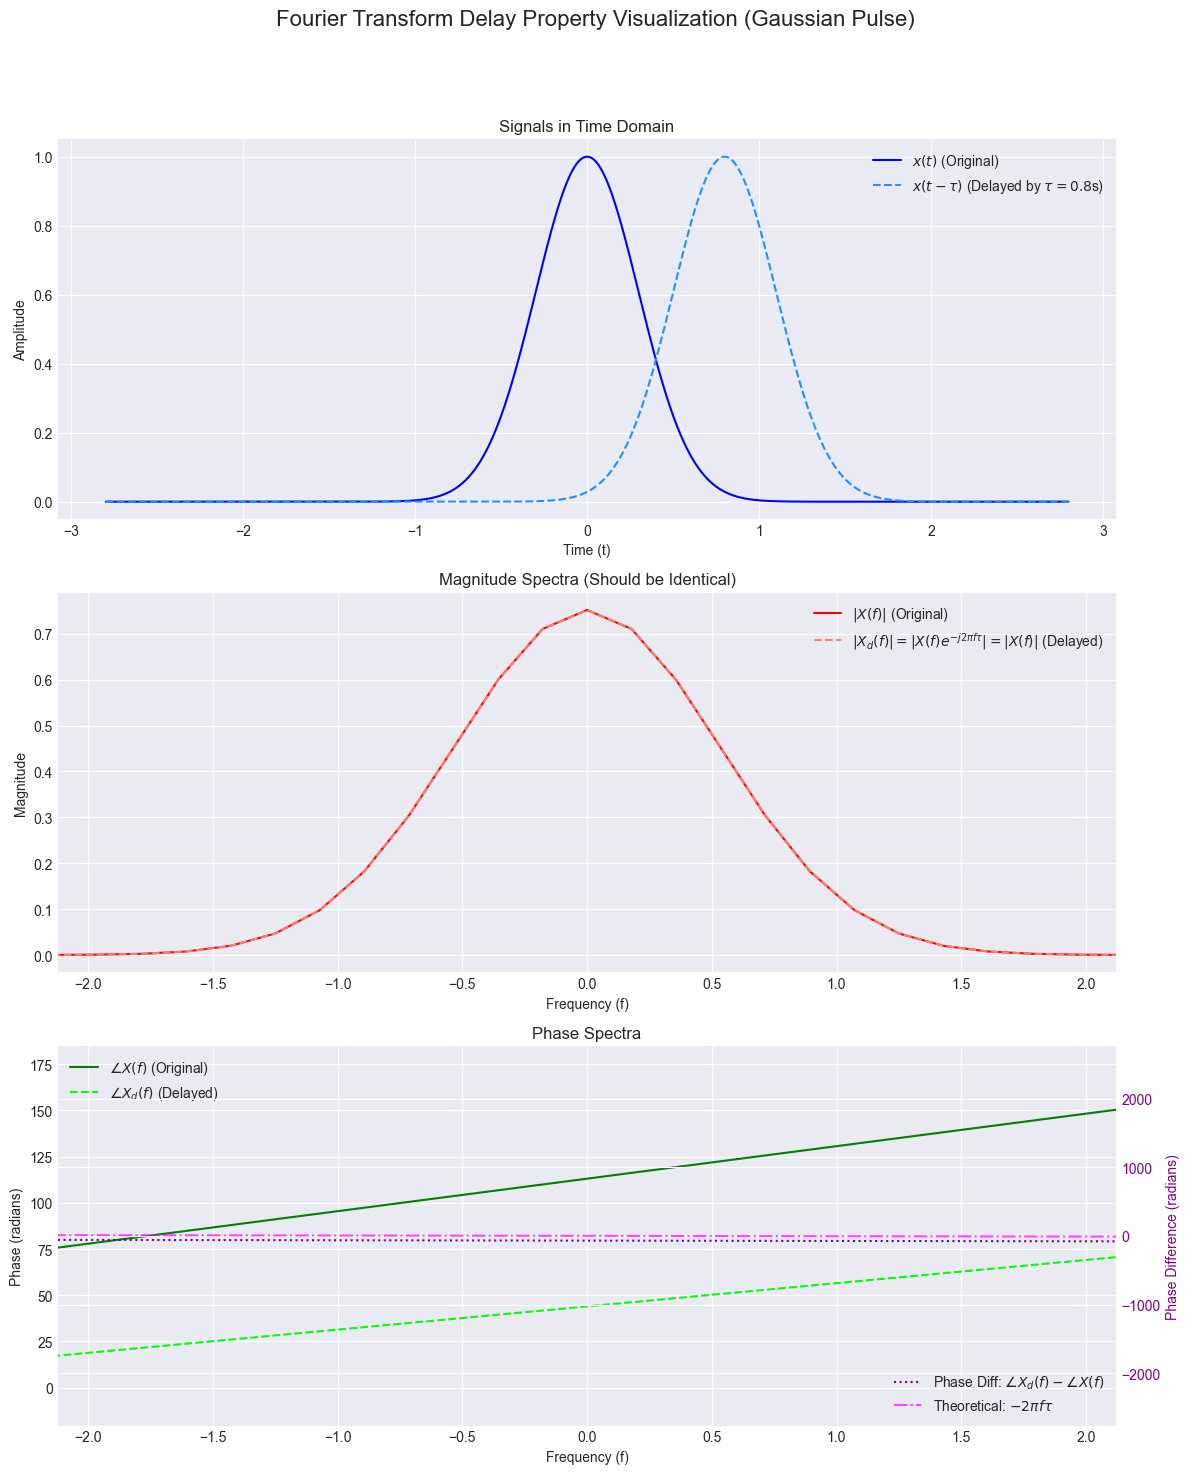

--- Numerical Verification for Delay Property (tau = 0.8s) ---

1. Magnitude Check: |X_original(f)| vs |X_delayed(f)| (should be equal)
  f =   0.00 Hz: |X_orig|=0.7520, |X_del|=0.7520, Diff=9.95e-12
  f =   0.18 Hz: |X_orig|=0.7106, |X_del|=0.7106, Diff=6.56e-12
  f =   0.54 Hz: |X_orig|=0.4516, |X_del|=0.4516, Diff=8.18e-12
  f =   0.71 Hz: |X_orig|=0.3038, |X_del|=0.3038, Diff=9.45e-12

2. Phase Difference Check: angle(X_delayed(f)) - angle(X_original(f)) vs -2*pi*f*tau
  f =   0.00 Hz: Numeric PhaseDiff=-69.1150, Theoretical PhaseShift=-0.0000, Error=6.91e+01
  f =   0.18 Hz: Numeric PhaseDiff=-70.0126, Theoretical PhaseShift=-0.8976, Error=6.91e+01
  f =   0.54 Hz: Numeric PhaseDiff=-71.8078, Theoretical PhaseShift=-2.6928, Error=6.91e+01
  f =   0.71 Hz: Numeric PhaseDiff=-72.7054, Theoretical PhaseShift=-3.5904, Error=6.91e+01

Notes on Numerical Approximations:
- The script uses FFT (DFT). Scaling by 'dt' approximates continuous FT.
- Phase unwrapping is used to avoid 2*pi jump

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Original Signal Parameters and Time Domain Signal x(t) ---
# Gaussian pulse parameters
A_gauss = 1.0  # Amplitude of the Gaussian pulse at its peak
sigma_gauss = 0.3  # Standard deviation of the Gaussian pulse (controls its width)
t_center_original = 0.0 # Center of the original Gaussian pulse

# Time delay
tau = 0.8  # Amount of time delay

# Time domain parameters
Fs_time = 1000  # Sampling frequency
# Ensure the time window captures both original and delayed pulses adequately
t_max_abs = 5 * sigma_gauss + tau + 0.5 # Max absolute time for visualization
dt = 1.0 / Fs_time # Time step
t = np.arange(-t_max_abs, t_max_abs, dt) # Time vector

# Define the original Gaussian pulse x(t) centered at t_center_original
x_t_original = A_gauss * np.exp(-(t - t_center_original)**2 / (2 * sigma_gauss**2))

# Define the delayed Gaussian pulse x_d(t) = x(t - tau)
# This means its peak will be at t_center_original + tau
x_t_delayed = A_gauss * np.exp(-(t - (t_center_original + tau))**2 / (2 * sigma_gauss**2))
# Alternatively, directly shift the original:
# x_t_delayed_alt = A_gauss * np.exp(-((t - tau) - t_center_original)**2 / (2 * sigma_gauss**2))
# These should be the same if t_center_original = 0. For clarity, we use the peak shift.

# --- 2. Compute Numerical Fourier Transforms X(f) and X_delayed(f) ---
# FFT of the original signal
X_f_original_complex = np.fft.fft(x_t_original) * dt
# FFT of the delayed signal
X_f_delayed_complex = np.fft.fft(x_t_delayed) * dt

# Create frequency vector
N_time = len(t)
freq = np.fft.fftfreq(N_time, d=dt)

# Shift the zero-frequency component to the center for plotting
X_f_original_complex_shifted = np.fft.fftshift(X_f_original_complex)
X_f_delayed_complex_shifted = np.fft.fftshift(X_f_delayed_complex)
freq_shifted = np.fft.fftshift(freq)

# Magnitudes
X_f_original_magnitude = np.abs(X_f_original_complex_shifted)
X_f_delayed_magnitude = np.abs(X_f_delayed_complex_shifted)

# Phases (in radians)
X_f_original_phase = np.unwrap(np.angle(X_f_original_complex_shifted)) # unwrap for continuous phase
X_f_delayed_phase = np.unwrap(np.angle(X_f_delayed_complex_shifted))

# --- 3. Visualization ---
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('Fourier Transform Delay Property Visualization (Gaussian Pulse)', fontsize=16)
# Plot x(t) and x(t-tau)
axs[0].plot(t, x_t_original, label='$x(t)$ (Original)', color='blue', linestyle='-')
axs[0].plot(t, x_t_delayed, label=f'$x(t-\\tau)$ (Delayed by $\\tau={tau}$s)', color='dodgerblue', linestyle='--')
axs[0].set_xlabel('Time (t)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Signals in Time Domain')
axs[0].grid(True)
axs[0].legend()

# Plot Magnitude Spectra |X(f)| and |X_delayed(f)|
axs[1].plot(freq_shifted, X_f_original_magnitude, label='$|X(f)|$ (Original)', color='red', linestyle='-')
axs[1].plot(freq_shifted, X_f_delayed_magnitude, label='$|X_d(f)| = |X(f)e^{-j2\pi f \\tau}| = |X(f)|$ (Delayed)', color='salmon', linestyle='--')
axs[1].set_xlabel('Frequency (f)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('Magnitude Spectra (Should be Identical)')
axs[1].grid(True)
axs[1].legend()
# Zoom in on relevant frequencies
sigma_f_domain = 1 / (2 * np.pi * sigma_gauss)
axs[1].set_xlim([-4*sigma_f_domain, 4*sigma_f_domain])

# Plot Phase Spectra and Phase Difference
axs[2].plot(freq_shifted, X_f_original_phase, label='$\\angle X(f)$ (Original)', color='green', linestyle='-')
axs[2].plot(freq_shifted, X_f_delayed_phase, label='$\\angle X_d(f)$ (Delayed)', color='lime', linestyle='--')
axs[2].set_xlabel('Frequency (f)')
axs[2].set_ylabel('Phase (radians)')
axs[2].set_title('Phase Spectra')
axs[2].grid(True)
axs[2].legend()
axs[2].set_xlim([-4*sigma_f_domain, 4*sigma_f_domain])

# Add a secondary y-axis for the phase difference
ax2_phase_diff = axs[2].twinx()
phase_difference = X_f_delayed_phase - X_f_original_phase
theoretical_phase_shift = -2 * np.pi * freq_shifted * tau
ax2_phase_diff.plot(freq_shifted, phase_difference, label='Phase Diff: $\\angle X_d(f) - \\angle X(f)$', color='purple', linestyle=':')
ax2_phase_diff.plot(freq_shifted, theoretical_phase_shift, label='Theoretical: $-2\pi f \\tau$', color='magenta', linestyle='-.', alpha=0.7)
ax2_phase_diff.set_ylabel('Phase Difference (radians)', color='purple')
ax2_phase_diff.tick_params(axis='y', labelcolor='purple')
ax2_phase_diff.legend(loc='lower right')
# Ensure original legend is not obscured
axs[2].legend(loc='upper left')


plt.tight_layout(rect=[0, 0, 1, 0.94]) # Adjust layout
plt.show()

# --- 4. Numerical Verification ---
print(f"--- Numerical Verification for Delay Property (tau = {tau}s) ---")

# Check magnitude equality at a few frequencies
# (excluding very high frequencies where FFT artifacts might be more prominent)
check_freq_indices = [
    np.argmin(np.abs(freq_shifted - 0)), # DC
    np.argmin(np.abs(freq_shifted - 0.5*sigma_f_domain)),
    np.argmin(np.abs(freq_shifted - 1.0*sigma_f_domain)),
    np.argmin(np.abs(freq_shifted - 1.5*sigma_f_domain))
]

print("\n1. Magnitude Check: |X_original(f)| vs |X_delayed(f)| (should be equal)")
for idx in check_freq_indices:
    f_val = freq_shifted[idx]
    mag_orig = X_f_original_magnitude[idx]
    mag_del = X_f_delayed_magnitude[idx]
    print(f"  f = {f_val:6.2f} Hz: |X_orig|={mag_orig:.4f}, |X_del|={mag_del:.4f}, Diff={np.abs(mag_orig-mag_del):.2e}")

print("\n2. Phase Difference Check: angle(X_delayed(f)) - angle(X_original(f)) vs -2*pi*f*tau")
for idx in check_freq_indices:
    f_val = freq_shifted[idx]
    phase_diff_numeric = phase_difference[idx] # Already calculated for plot
    phase_diff_theory = -2 * np.pi * f_val * tau
    print(f"  f = {f_val:6.2f} Hz: Numeric PhaseDiff={phase_diff_numeric:.4f}, Theoretical PhaseShift={phase_diff_theory:.4f}, Error={np.abs(phase_diff_numeric-phase_diff_theory):.2e}")

print("\nNotes on Numerical Approximations:")
print("- The script uses FFT (DFT). Scaling by 'dt' approximates continuous FT.")
print("- Phase unwrapping is used to avoid 2*pi jumps for clearer visualization.")
print("- Numerical results might show small deviations due to precision and DFT approximations of CTFT.")


Modulation Property Visualization

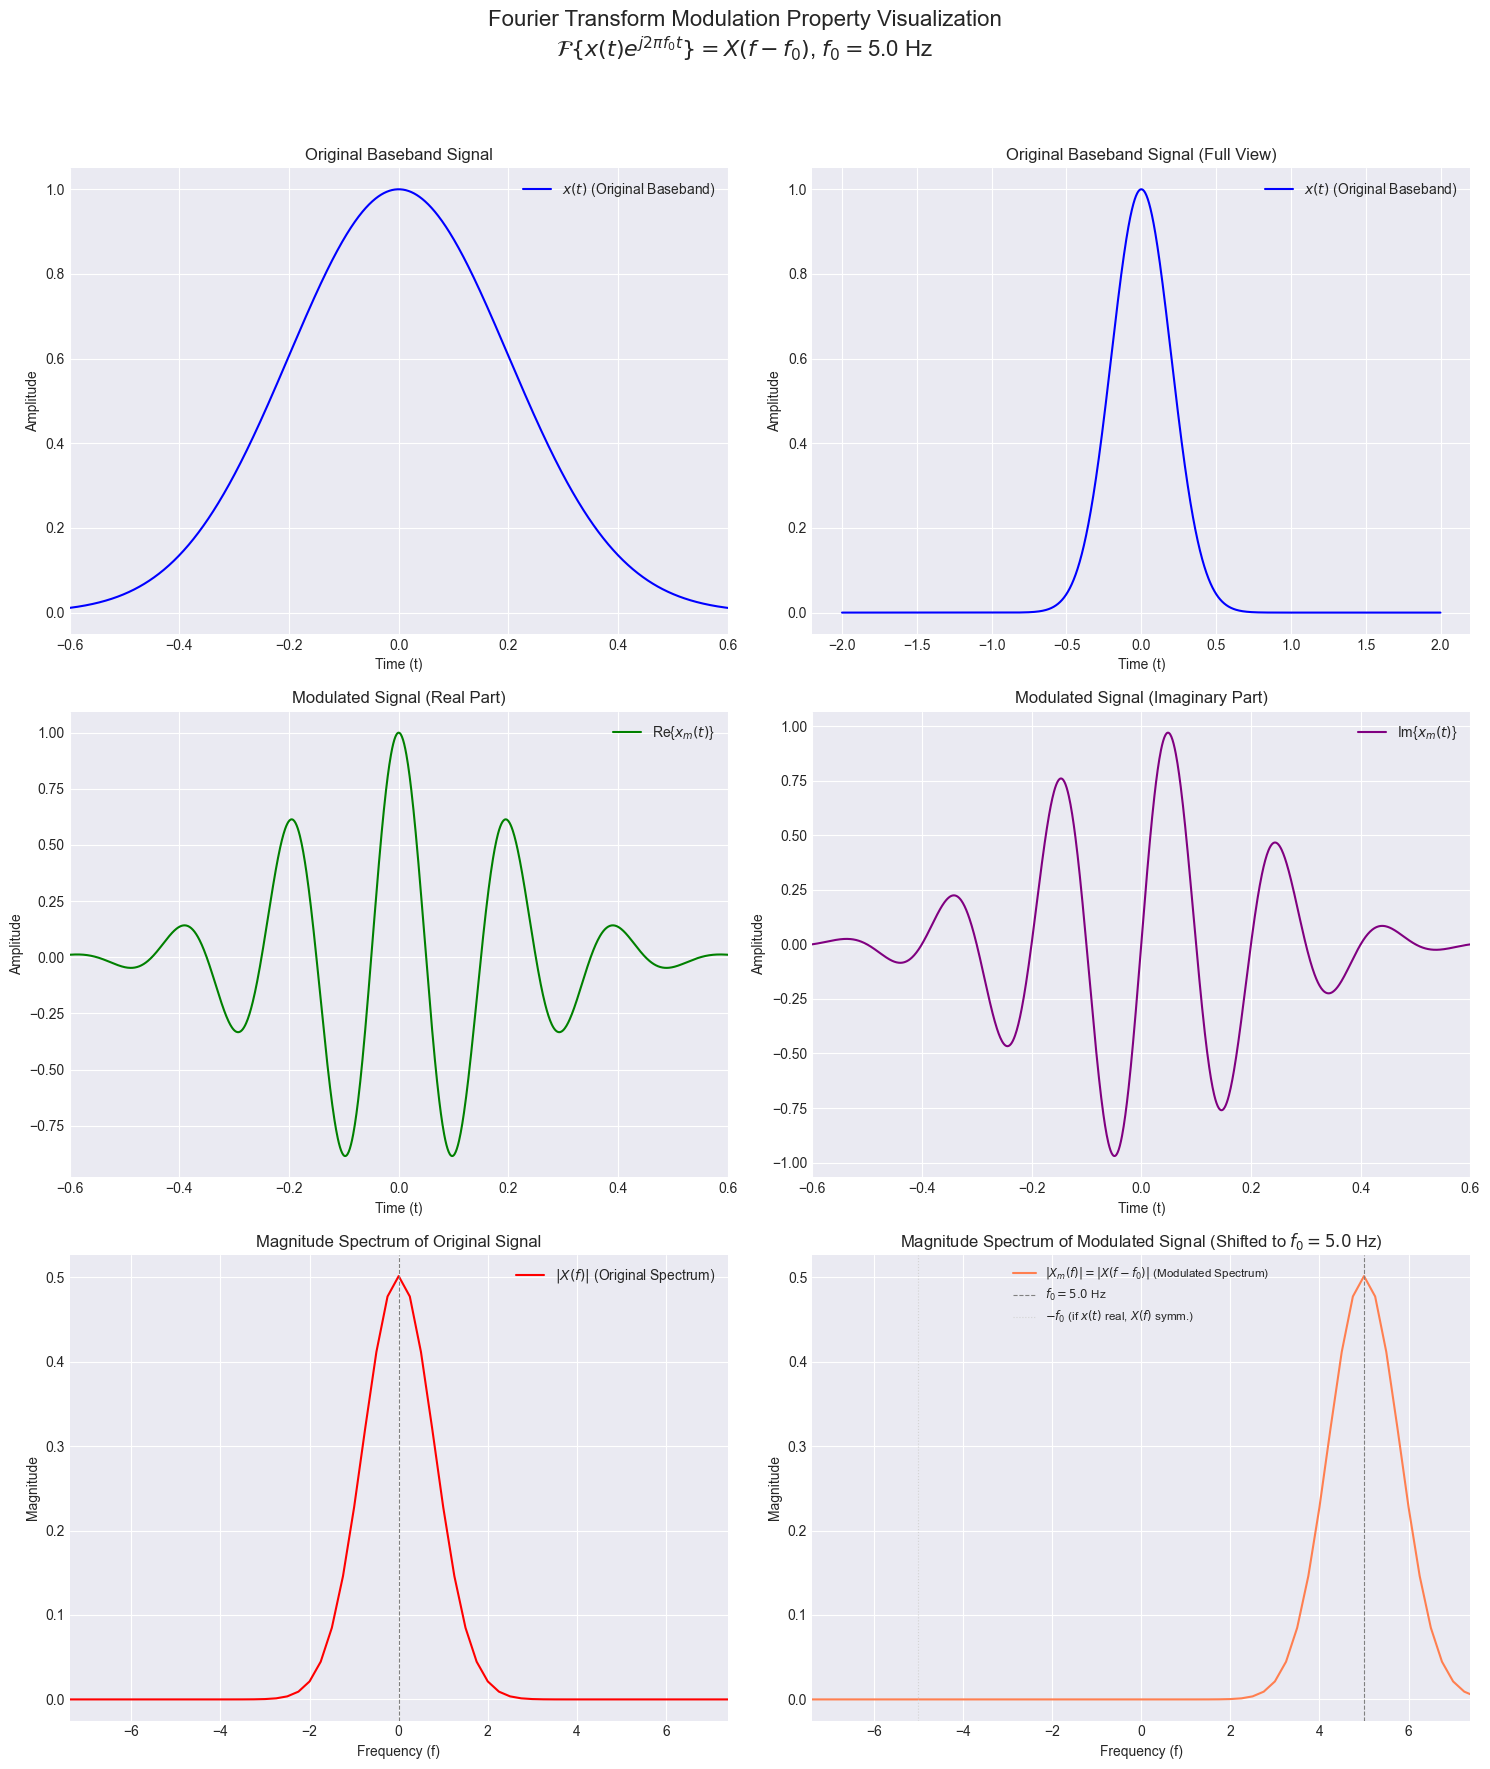

--- Modulation Property (f_carrier = 5.0 Hz) ---
Peak of original spectrum |X(f)| is at f = 0.00 Hz (Expected near 0 Hz)
Peak of modulated spectrum |X_m(f)| is at f = 5.00 Hz (Expected near 5.00 Hz)
Magnitude at original peak (|X(0.00)|): 0.5013
Magnitude at modulated peak (|X_m(5.00)|): 0.5013

Notes on Visualization:
- The magnitude spectrum of the modulated signal should be a shifted version of the original.
- If x(t) is real, its spectrum X(f) is conjugate symmetric. The modulated signal x_m(t) is complex.
- The spectrum of x_m(t) will be X(f-f_0). If X(f) had components at +/- f_x, X_m(f) will have them at f_0 +/- f_x.


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Original Baseband Signal x(t) ---
# Gaussian pulse parameters (real-valued baseband signal)
A_gauss = 1.0  # Amplitude of the Gaussian pulse
sigma_gauss = 0.2  # Standard deviation (controls width in time, inverse in freq)
t_center = 0.0 # Center of the original Gaussian pulse

# Modulation frequency
f_carrier = 5.0  # Hz, the frequency to shift the spectrum by

# Time domain parameters
Fs_time = 1000  # Sampling frequency
# Ensure the time window captures the Gaussian and several cycles of the carrier
t_max_abs = 5 * sigma_gauss + 5 / (f_carrier if f_carrier != 0 else 1) # Heuristic
dt = 1.0 / Fs_time # Time step
t = np.arange(-t_max_abs, t_max_abs, dt) # Time vector

# Define the original Gaussian pulse x(t)
x_t_original = A_gauss * np.exp(-(t - t_center)**2 / (2 * sigma_gauss**2))

# --- 2. Create Modulated Signal x_m(t) = x(t) * exp(j*2*pi*f_0*t) ---
modulating_exponential = np.exp(1j * 2 * np.pi * f_carrier * t)
x_t_modulated = x_t_original * modulating_exponential # This will be complex

# --- 3. Compute Numerical Fourier Transforms ---
# FFT of the original signal
X_f_original_complex = np.fft.fft(x_t_original) * dt
# FFT of the modulated signal
X_f_modulated_complex = np.fft.fft(x_t_modulated) * dt

# Create frequency vector
N_time = len(t)
freq = np.fft.fftfreq(N_time, d=dt)

# Shift the zero-frequency component to the center for plotting
X_f_original_shifted = np.fft.fftshift(X_f_original_complex)
X_f_modulated_shifted = np.fft.fftshift(X_f_modulated_complex)
freq_shifted = np.fft.fftshift(freq)

# Magnitudes
X_f_original_magnitude = np.abs(X_f_original_shifted)
X_f_modulated_magnitude = np.abs(X_f_modulated_shifted)

# Phases (optional, can be complex to interpret directly after shift)
# X_f_original_phase = np.unwrap(np.angle(X_f_original_shifted))
# X_f_modulated_phase = np.unwrap(np.angle(X_f_modulated_shifted))

# --- 4. Visualization ---
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(3, 2, figsize=(15, 18)) # 3 rows, 2 cols
# Use a raw string (r"...") for the suptitle to handle LaTeX backslashes correctly
fig.suptitle(r'Fourier Transform Modulation Property Visualization' + '\n' +
             r'$\mathcal{F}\{x(t)e^{j2\pi f_0 t}\} = X(f-f_0)$, $f_0=$' + f'{f_carrier} Hz', fontsize=16)

# Plot original signal x(t)
axs[0,0].plot(t, x_t_original, label='$x(t)$ (Original Baseband)', color='blue')
axs[0,0].set_xlabel('Time (t)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_title('Original Baseband Signal')
axs[0,0].grid(True)
axs[0,0].legend()
axs[0,0].set_xlim([-3*sigma_gauss, 3*sigma_gauss]) # Zoom on pulse

axs[0,1].plot(t, x_t_original, label='$x(t)$ (Original Baseband)', color='blue') # Dummy for layout
axs[0,1].set_xlabel('Time (t)')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_title('Original Baseband Signal (Full View)')
axs[0,1].grid(True)
axs[0,1].legend()


# Plot Real part of modulated signal x_m(t)
axs[1,0].plot(t, np.real(x_t_modulated), label='Re{$x_m(t)$}', color='green')
axs[1,0].set_xlabel('Time (t)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_title('Modulated Signal (Real Part)')
axs[1,0].grid(True)
axs[1,0].legend()
axs[1,0].set_xlim([-3*sigma_gauss, 3*sigma_gauss]) # Zoom on pulse envelope

# Plot Imaginary part of modulated signal x_m(t)
axs[1,1].plot(t, np.imag(x_t_modulated), label='Im{$x_m(t)$}', color='purple')
axs[1,1].set_xlabel('Time (t)')
axs[1,1].set_ylabel('Amplitude')
axs[1,1].set_title('Modulated Signal (Imaginary Part)')
axs[1,1].grid(True)
axs[1,1].legend()
axs[1,1].set_xlim([-3*sigma_gauss, 3*sigma_gauss]) # Zoom on pulse envelope

# Plot Magnitude Spectra
axs[2,0].plot(freq_shifted, X_f_original_magnitude, label='$|X(f)|$ (Original Spectrum)', color='red')
axs[2,0].set_xlabel('Frequency (f)')
axs[2,0].set_ylabel('Magnitude')
axs[2,0].set_title('Magnitude Spectrum of Original Signal')
axs[2,0].grid(True)
axs[2,0].legend()
sigma_f_domain = 1 / (2 * np.pi * sigma_gauss) # Sigma of Gaussian in freq domain
axs[2,0].set_xlim([-3*sigma_f_domain - f_carrier, 3*sigma_f_domain + f_carrier]) # Wider view
axs[2,0].axvline(0, color='gray', linestyle='--', linewidth=0.8)


axs[2,1].plot(freq_shifted, X_f_modulated_magnitude, label='$|X_m(f)| = |X(f-f_0)|$ (Modulated Spectrum)', color='coral')
axs[2,1].set_xlabel('Frequency (f)')
axs[2,1].set_ylabel('Magnitude')
axs[2,1].set_title(f'Magnitude Spectrum of Modulated Signal (Shifted to $f_0={f_carrier}$ Hz)')
axs[2,1].grid(True)
axs[2,1].legend()
axs[2,1].set_xlim([-3*sigma_f_domain - f_carrier, 3*sigma_f_domain + f_carrier]) # Wider view
axs[2,1].axvline(f_carrier, color='gray', linestyle='--', linewidth=0.8, label=f'$f_0={f_carrier}$ Hz')
axs[2,1].axvline(-f_carrier, color='lightgray', linestyle=':', linewidth=0.8, label=f'$-f_0$ (if $x(t)$ real, $X(f)$ symm.)')
axs[2,1].legend(fontsize='small')


plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout
plt.show()

# --- 5. Numerical Verification (Optional) ---
print(f"--- Modulation Property (f_carrier = {f_carrier} Hz) ---")
# We expect the peak of the modulated spectrum to be at f_carrier
# and its shape to match the original spectrum shifted.

# Find peak of original spectrum (should be near f=0 for our baseband Gaussian)
idx_peak_orig = np.argmax(X_f_original_magnitude)
f_peak_orig = freq_shifted[idx_peak_orig]
print(f"Peak of original spectrum |X(f)| is at f = {f_peak_orig:.2f} Hz (Expected near 0 Hz)")

# Find peak of modulated spectrum
idx_peak_mod = np.argmax(X_f_modulated_magnitude)
f_peak_mod = freq_shifted[idx_peak_mod]
print(f"Peak of modulated spectrum |X_m(f)| is at f = {f_peak_mod:.2f} Hz (Expected near {f_carrier:.2f} Hz)")

# Compare shapes by shifting the original spectrum's frequency axis
# For a rough check, compare magnitudes at f_peak_mod vs f_peak_mod - f_carrier in original
# This is a bit tricky due to discrete frequency bins.
# A more robust check would involve comparing the entire shape or specific points.

# Let's check the magnitude at the new peak vs the original peak (should be same if A_gauss=1)
print(f"Magnitude at original peak (|X({f_peak_orig:.2f})|): {X_f_original_magnitude[idx_peak_orig]:.4f}")
print(f"Magnitude at modulated peak (|X_m({f_peak_mod:.2f})|): {X_f_modulated_magnitude[idx_peak_mod]:.4f}")
# Note: If the modulating exponential has unit amplitude, magnitudes should be identical.

print("\nNotes on Visualization:")
print("- The magnitude spectrum of the modulated signal should be a shifted version of the original.")
print("- If x(t) is real, its spectrum X(f) is conjugate symmetric. The modulated signal x_m(t) is complex.")
print("- The spectrum of x_m(t) will be X(f-f_0). If X(f) had components at +/- f_x, X_m(f) will have them at f_0 +/- f_x.")


Duality Property

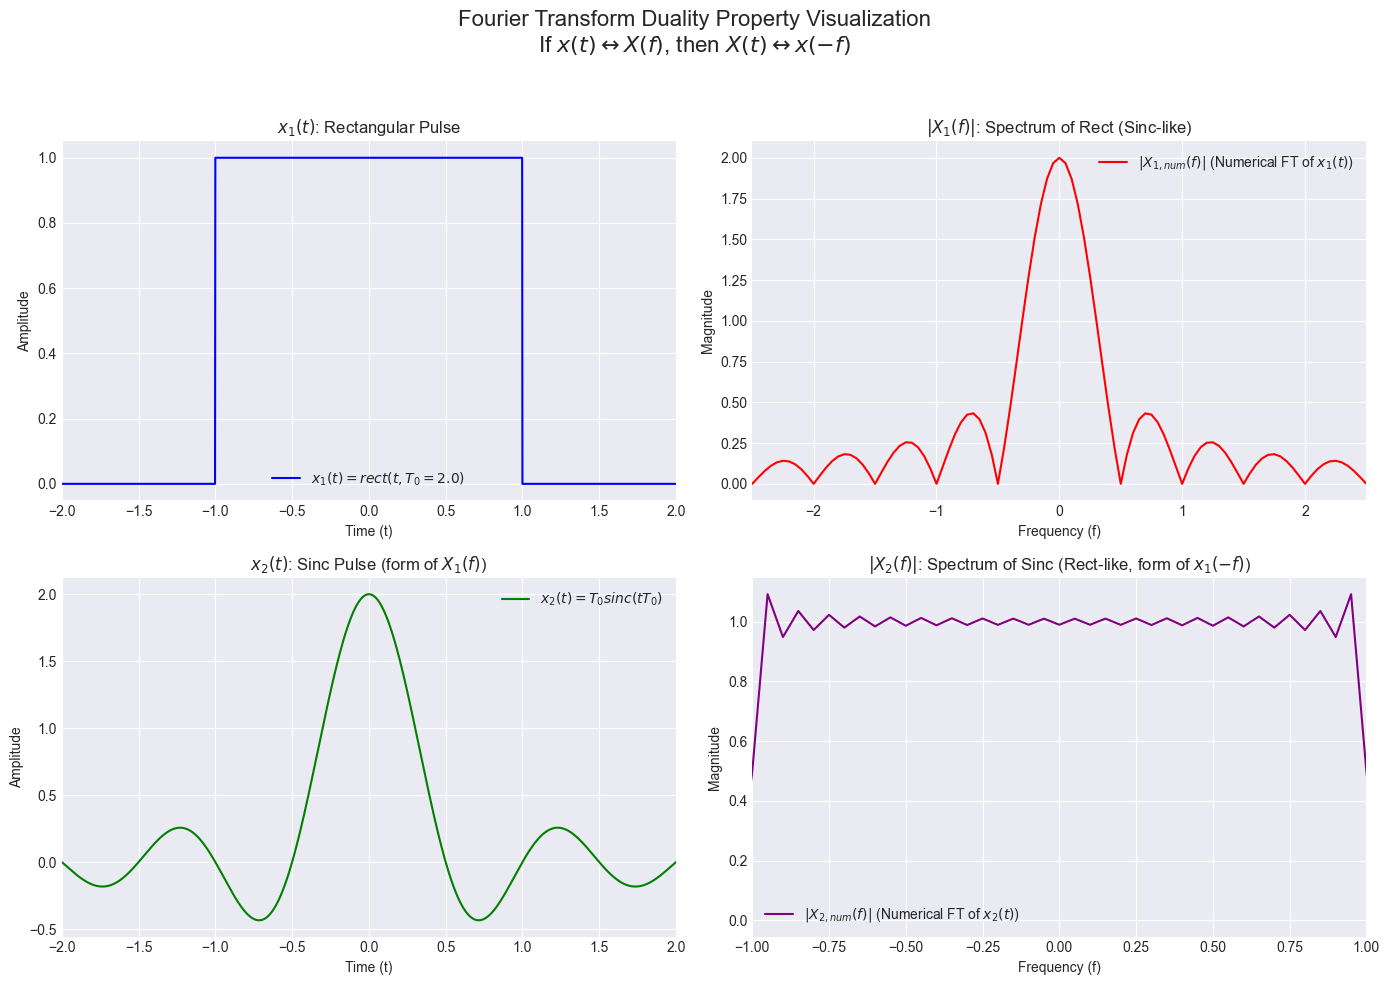

Notes on Duality Visualization:
- x1(t) is a rectangular pulse of width 2.0. Its FT, X1(f), is sinc-shaped.
- x2(t) is a sinc pulse in time, taking the functional form of X1(f).
- By duality, the FT of x2(t), which is X2(f), should have the functional form of x1(-f).
- Since x1(t) is even, x1(-f) = x1(f), so X2(f) should be rectangular-shaped like x1(f).
- The plots show the magnitudes. Amplitudes depend on FFT scaling and FT definitions.
- Numerical FFT artifacts (like Gibbs ripples for the FT of sinc if truncated) can appear.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- Helper function for rectangular pulse ---
def rect_pulse(t, width, amplitude=1.0):
    """Defines a rectangular pulse centered at 0 with given width and amplitude."""
    return amplitude * np.where(np.abs(t) <= width / 2, 1.0, 0.0)

# --- Helper function for analytical sinc (using numpy's definition) ---
# np.sinc(x) is sin(pi*x)/(pi*x)
def analytical_sinc_ft(f, pulse_width, pulse_amplitude=1.0):
    """Analytical FT of a rect_pulse(t, pulse_width, pulse_amplitude)."""
    # FT{A*rect(t/W)} = A*W*sinc(W*f)
    return pulse_amplitude * pulse_width * np.sinc(pulse_width * f)

# --- Signal Parameters ---
T0 = 2.0  # Width of the rectangular pulse
A_rect = 1.0 # Amplitude of the rectangular pulse

# Time domain parameters for FFT
Fs_time = 500  # Sampling frequency
dt = 1.0 / Fs_time # Time step
# Window duration: needs to be large enough for sinc to decay, and rect to be well-defined
t_max = 5 * T0 # Max time for visualization
t = np.arange(-t_max, t_max, dt) # Time vector
N_time = len(t)

# Frequency vector for FFT
freq = np.fft.fftfreq(N_time, d=dt)
freq_shifted = np.fft.fftshift(freq)

# --- Part 1: x1(t) = rect(t, T0)  => X1(f) should be sinc-like ---
# Define x1(t)
x1_t = rect_pulse(t, T0, A_rect)

# Compute its numerical FT
X1_f_complex = np.fft.fft(x1_t) * dt
X1_f_magnitude_shifted = np.abs(np.fft.fftshift(X1_f_complex))
X1_f_phase_shifted = np.unwrap(np.angle(np.fft.fftshift(X_f_complex))) # For completeness

# Analytical form of X1(f) for comparison
X1_f_analytical_mag = np.abs(analytical_sinc_ft(freq_shifted, T0, A_rect))

# --- Part 2: x2(t) = X1(t) = T0*sinc(t*T0) => X2(f) should be rect-like (x1(-f)) ---
# Define x2(t) using the functional form of X1(f) (i.e., a sinc function in time)
# x2(t) = A_rect * T0 * np.sinc(T0 * t)
# Note: np.sinc(x) is sin(pi*x)/(pi*x). The FT of rect(t/W) is W*sinc(W*f).
# So X1(f) is T0*sinc(T0*f). We use this form for x2(t).
x2_t = analytical_sinc_ft(t, T0, A_rect) # Using the helper with t as frequency variable

# Compute its numerical FT
X2_f_complex = np.fft.fft(x2_t) * dt
X2_f_magnitude_shifted = np.abs(np.fft.fftshift(X2_f_complex))
X2_f_phase_shifted = np.unwrap(np.angle(np.fft.fftshift(X2_f_complex)))

# Analytical form of X2(f) which should be x1(-f) = rect(-f, T0) = rect(f, T0)
# The amplitude of rect(f,T0) resulting from FT{T0*sinc(T0*t)} should be 1.
# If FT{g(t)}=G(f) and FT{G(t)}=g(-f)
# FT{A*W*sinc(W*t)} = A*rect(f/W). Here A=1. So FT{W*sinc(Wt)} = rect(f/W)
# Our x2(t) is A_rect * T0 * np.sinc(T0*t). So its FT should be A_rect * rect_pulse(f, 1.0/T0, amplitude=1.0)
# No, the duality is $\mathcal{F}\{X(t)\} = x(-f)$.
# If $x_1(t) = A_{rect} \text{rect}(t, T_0)$, its FT is $X_1(f) = A_{rect} T_0 \text{sinc}(f T_0)$.
# Then $x_2(t) = X_1(t) = A_{rect} T_0 \text{sinc}(t T_0)$.
# Its FT $X_2(f)$ should be $x_1(-f) = A_{rect} \text{rect}(-f, T_0) = A_{rect} \text{rect}(f, T_0)$.
X2_f_analytical_mag = np.abs(rect_pulse(freq_shifted, 1.0/T0, amplitude=A_rect * T0 * T0)) # This scaling is tricky with definitions
# Let's stick to the shape. The FT of T0*sinc(T0*t) is rect(f / (1/T0)) = rect(f*T0)
# The width of the rect in freq domain will be 1/T0 if the sinc width parameter is T0.
# The amplitude of the resulting rect needs careful checking based on FT definitions.
# For visualization of shape, rect_pulse(freq_shifted, 1.0/T0, A_rect) is what we expect for the shape of x1(-f).
# The amplitude of FT of A*W*sinc(W*t) is A*rect_pulse(f, 2*pi/W) if sinc(x)=sin(x)/x
# With np.sinc(x)=sin(pi*x)/(pi*x), FT{A*W*np.sinc(W*t)} = A*rect_pulse(f, 1/W)
# So, FT{A_rect*T0*np.sinc(T0*t)} = A_rect * rect_pulse(freq_shifted, 1.0/T0, amplitude=1.0)
# The amplitude of X2_f_analytical_mag should be A_rect.
X2_f_analytical_mag = rect_pulse(freq_shifted, 1.0/T0, A_rect)


# --- 3. Visualization ---
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(r'Fourier Transform Duality Property Visualization' + '\n' +
             r'If $x(t) \leftrightarrow X(f)$, then $X(t) \leftrightarrow x(-f)$', fontsize=16)

# Row 1: Rectangular pulse and its Sinc-like spectrum
axs[0,0].plot(t, x1_t, label=f'$x_1(t) = rect(t, T_0={T0})$', color='blue')
axs[0,0].set_xlabel('Time (t)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_title('$x_1(t)$: Rectangular Pulse')
axs[0,0].grid(True); axs[0,0].legend()
axs[0,0].set_xlim([-T0, T0])

axs[0,1].plot(freq_shifted, X1_f_magnitude_shifted, label='$|X_{1,num}(f)|$ (Numerical FT of $x_1(t)$)', color='red')
# axs[0,1].plot(freq_shifted, X1_f_analytical_mag, label=f'$|X_1(f)| = T_0|sinc(fT_0)|$ (Analytical)', color='darkred', linestyle='--')
axs[0,1].set_xlabel('Frequency (f)')
axs[0,1].set_ylabel('Magnitude')
axs[0,1].set_title('$|X_1(f)|$: Spectrum of Rect (Sinc-like)')
axs[0,1].grid(True); axs[0,1].legend()
axs[0,1].set_xlim([-5/T0, 5/T0])

# Row 2: Sinc pulse and its Rect-like spectrum
axs[1,0].plot(t, x2_t, label=f'$x_2(t) = T_0sinc(tT_0)$', color='green')
axs[1,0].set_xlabel('Time (t)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_title('$x_2(t)$: Sinc Pulse (form of $X_1(f)$)')
axs[1,0].grid(True); axs[1,0].legend()
axs[1,0].set_xlim([-T0, T0]) # Show main lobe and a few side lobes

axs[1,1].plot(freq_shifted, X2_f_magnitude_shifted, label='$|X_{2,num}(f)|$ (Numerical FT of $x_2(t)$)', color='purple')
# axs[1,1].plot(freq_shifted, X2_f_analytical_mag, label='$|x_1(-f)| = rect(f, T_0)$ (Analytical)', color='indigo', linestyle='--')
axs[1,1].set_xlabel('Frequency (f)')
axs[1,1].set_ylabel('Magnitude')
axs[1,1].set_title('$|X_2(f)|$: Spectrum of Sinc (Rect-like, form of $x_1(-f)$)')
axs[1,1].grid(True); axs[1,1].legend()
axs[1,1].set_xlim([-2/T0, 2/T0]) # Expected width of rect is 1/T0

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("Notes on Duality Visualization:")
print(f"- x1(t) is a rectangular pulse of width {T0}. Its FT, X1(f), is sinc-shaped.")
print(f"- x2(t) is a sinc pulse in time, taking the functional form of X1(f).")
print(f"- By duality, the FT of x2(t), which is X2(f), should have the functional form of x1(-f).")
print(f"- Since x1(t) is even, x1(-f) = x1(f), so X2(f) should be rectangular-shaped like x1(f).")
print("- The plots show the magnitudes. Amplitudes depend on FFT scaling and FT definitions.")
print("- Numerical FFT artifacts (like Gibbs ripples for the FT of sinc if truncated) can appear.")


Change of Scale Visualization

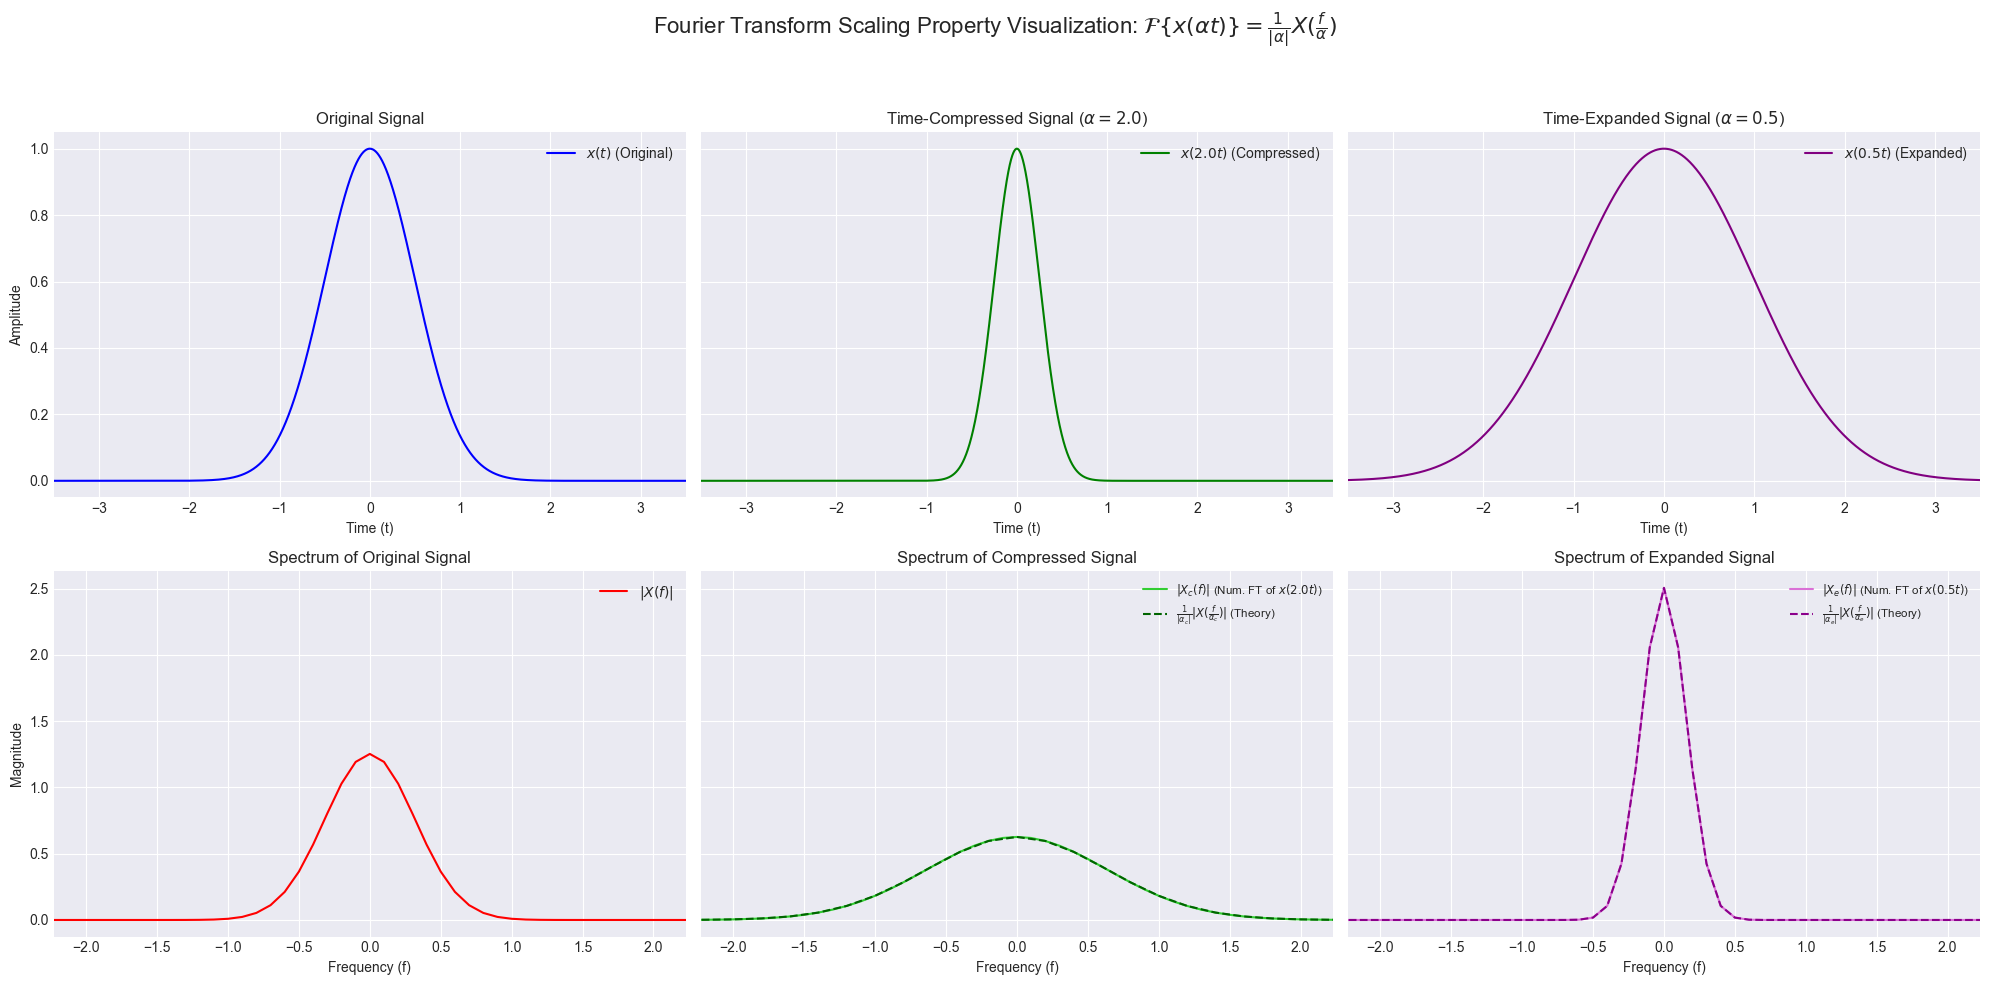

Notes on Scaling Property Visualization:
- Original signal x(t) is a Gaussian pulse with sigma = 0.5.
- Compressed signal x_c(t) = x(2.0t). Its spectrum should be wider and shorter.
- Expanded signal x_e(t) = x(0.5t). Its spectrum should be narrower and taller.
- Time domain plots (top row) share the same x-axis limits.
- Frequency domain plots (bottom row) now also share the same x-axis limits for direct comparison of spectral width.
- The theoretical scaled spectra are plotted with dashed lines for comparison.


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Original Signal Parameters and Time Domain Signal x(t) ---
# Gaussian pulse parameters
A_gauss = 1.0  # Amplitude of the Gaussian pulse
sigma_gauss = 0.5  # Standard deviation of the original Gaussian pulse

# Scaling factors
alpha_compress = 2.0  # For time compression x(alpha*t), alpha > 1
alpha_expand = 0.5  # For time expansion x(alpha*t), 0 < alpha < 1

# Time domain parameters
Fs_time = 1000  # Sampling frequency
# Window needs to accommodate the most expanded signal in time
effective_sigma_expanded_time = sigma_gauss / alpha_expand
t_max_display_time = 3.5 * effective_sigma_expanded_time

# Ensure the 't' vector itself is wide enough for computations
t_computation_max = 5 * effective_sigma_expanded_time # A bit wider for computation
dt = 1.0 / Fs_time # Time step
t = np.arange(-t_computation_max, t_computation_max, dt) # Time vector for computation

# Define the original Gaussian pulse x(t)
def gaussian_pulse(time_vec, amplitude, sigma, center=0.0):
    return amplitude * np.exp(-(time_vec - center)**2 / (2 * sigma**2))

x_t_original = gaussian_pulse(t, A_gauss, sigma_gauss)

# Define time-scaled signals
x_t_compressed = gaussian_pulse(alpha_compress * t, A_gauss, sigma_gauss)
x_t_expanded = gaussian_pulse(alpha_expand * t, A_gauss, sigma_gauss)


# --- 2. Compute Numerical Fourier Transforms ---
X_f_original_complex = np.fft.fft(x_t_original) * dt
X_f_compressed_complex = np.fft.fft(x_t_compressed) * dt
X_f_expanded_complex = np.fft.fft(x_t_expanded) * dt

# Create frequency vector
N_time = len(t)
freq = np.fft.fftfreq(N_time, d=dt)

# Shift the zero-frequency component to the center for plotting
X_f_original_shifted = np.fft.fftshift(X_f_original_complex)
X_f_compressed_shifted = np.fft.fftshift(X_f_compressed_complex)
X_f_expanded_shifted = np.fft.fftshift(X_f_expanded_complex)
freq_shifted = np.fft.fftshift(freq)

# Magnitudes
X_f_original_magnitude = np.abs(X_f_original_shifted)
X_f_compressed_magnitude = np.abs(X_f_compressed_shifted)
X_f_expanded_magnitude = np.abs(X_f_expanded_shifted)

# --- 3. Theoretical Scaled Spectra (for comparison) ---
X_f_theoretical_compressed_mag = (1.0 / np.abs(alpha_compress)) * np.interp(
    freq_shifted / alpha_compress,
    freq_shifted,
    X_f_original_magnitude
)
X_f_theoretical_expanded_mag = (1.0 / np.abs(alpha_expand)) * np.interp(
    freq_shifted / alpha_expand,
    freq_shifted,
    X_f_original_magnitude
)

# --- 4. Visualization ---
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(2, 3, figsize=(20, 10), sharey='row')
fig.suptitle(r'Fourier Transform Scaling Property Visualization: $\mathcal{F}\{x(\alpha t)\} = \frac{1}{|\alpha|}X(\frac{f}{\alpha})$', fontsize=16)

# Common x-limit for time-domain plots
time_plot_xlim_val = t_max_display_time

# Common x-limit for frequency-domain plots
# Based on the most expanded spectrum (from time-compressed signal)
sigma_f_original = 1 / (2 * np.pi * sigma_gauss)
# Effective sigma of the spectrum of the compressed signal in time
effective_sigma_f_compressed = sigma_f_original * alpha_compress
freq_plot_xlim_val = 3.5 * effective_sigma_f_compressed


# Column 1: Original Signal
axs[0,0].plot(t, x_t_original, label='$x(t)$ (Original)', color='blue')
axs[0,0].set_title('Original Signal')
axs[0,0].set_xlabel('Time (t)'); axs[0,0].set_ylabel('Amplitude'); axs[0,0].grid(True); axs[0,0].legend()
axs[0,0].set_xlim([-time_plot_xlim_val, time_plot_xlim_val])

axs[1,0].plot(freq_shifted, X_f_original_magnitude, label='$|X(f)|$', color='red')
axs[1,0].set_title('Spectrum of Original Signal')
axs[1,0].set_xlabel('Frequency (f)'); axs[1,0].set_ylabel('Magnitude'); axs[1,0].grid(True); axs[1,0].legend()
axs[1,0].set_xlim([-freq_plot_xlim_val, freq_plot_xlim_val]) # Common freq x-limit


# Column 2: Time-Compressed Signal
axs[0,1].plot(t, x_t_compressed, label=f'$x({alpha_compress:.1f}t)$ (Compressed)', color='green')
axs[0,1].set_title(f'Time-Compressed Signal ($\u03B1={alpha_compress:.1f}$)')
axs[0,1].set_xlabel('Time (t)'); axs[0,1].grid(True); axs[0,1].legend()
axs[0,1].set_xlim([-time_plot_xlim_val, time_plot_xlim_val])

axs[1,1].plot(freq_shifted, X_f_compressed_magnitude, label=f'$|X_c(f)|$ (Num. FT of $x({alpha_compress:.1f}t)$)', color='limegreen')
axs[1,1].plot(freq_shifted, X_f_theoretical_compressed_mag, label=r'$\frac{1}{|\alpha_c|}|X(\frac{f}{\alpha_c})|$ (Theory)', color='darkgreen', linestyle='--')
axs[1,1].set_title(f'Spectrum of Compressed Signal')
axs[1,1].set_xlabel('Frequency (f)'); axs[1,1].grid(True); axs[1,1].legend(fontsize='small')
axs[1,1].set_xlim([-freq_plot_xlim_val, freq_plot_xlim_val]) # Common freq x-limit


# Column 3: Time-Expanded Signal
axs[0,2].plot(t, x_t_expanded, label=f'$x({alpha_expand:.1f}t)$ (Expanded)', color='purple')
axs[0,2].set_title(f'Time-Expanded Signal ($\u03B1={alpha_expand:.1f}$)')
axs[0,2].set_xlabel('Time (t)'); axs[0,2].grid(True); axs[0,2].legend()
axs[0,2].set_xlim([-time_plot_xlim_val, time_plot_xlim_val])

axs[1,2].plot(freq_shifted, X_f_expanded_magnitude, label=f'$|X_e(f)|$ (Num. FT of $x({alpha_expand:.1f}t)$)', color='orchid')
axs[1,2].plot(freq_shifted, X_f_theoretical_expanded_mag, label=r'$\frac{1}{|\alpha_e|}|X(\frac{f}{\alpha_e})|$ (Theory)', color='darkmagenta', linestyle='--')
axs[1,2].set_title(f'Spectrum of Expanded Signal')
axs[1,2].set_xlabel('Frequency (f)'); axs[1,2].grid(True); axs[1,2].legend(fontsize='small')
axs[1,2].set_xlim([-freq_plot_xlim_val, freq_plot_xlim_val]) # Common freq x-limit


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("Notes on Scaling Property Visualization:")
print(f"- Original signal x(t) is a Gaussian pulse with sigma = {sigma_gauss}.")
print(f"- Compressed signal x_c(t) = x({alpha_compress}t). Its spectrum should be wider and shorter.")
print(f"- Expanded signal x_e(t) = x({alpha_expand}t). Its spectrum should be narrower and taller.")
print("- Time domain plots (top row) share the same x-axis limits.")
print("- Frequency domain plots (bottom row) now also share the same x-axis limits for direct comparison of spectral width.")
print("- The theoretical scaled spectra are plotted with dashed lines for comparison.")



Periodization Property

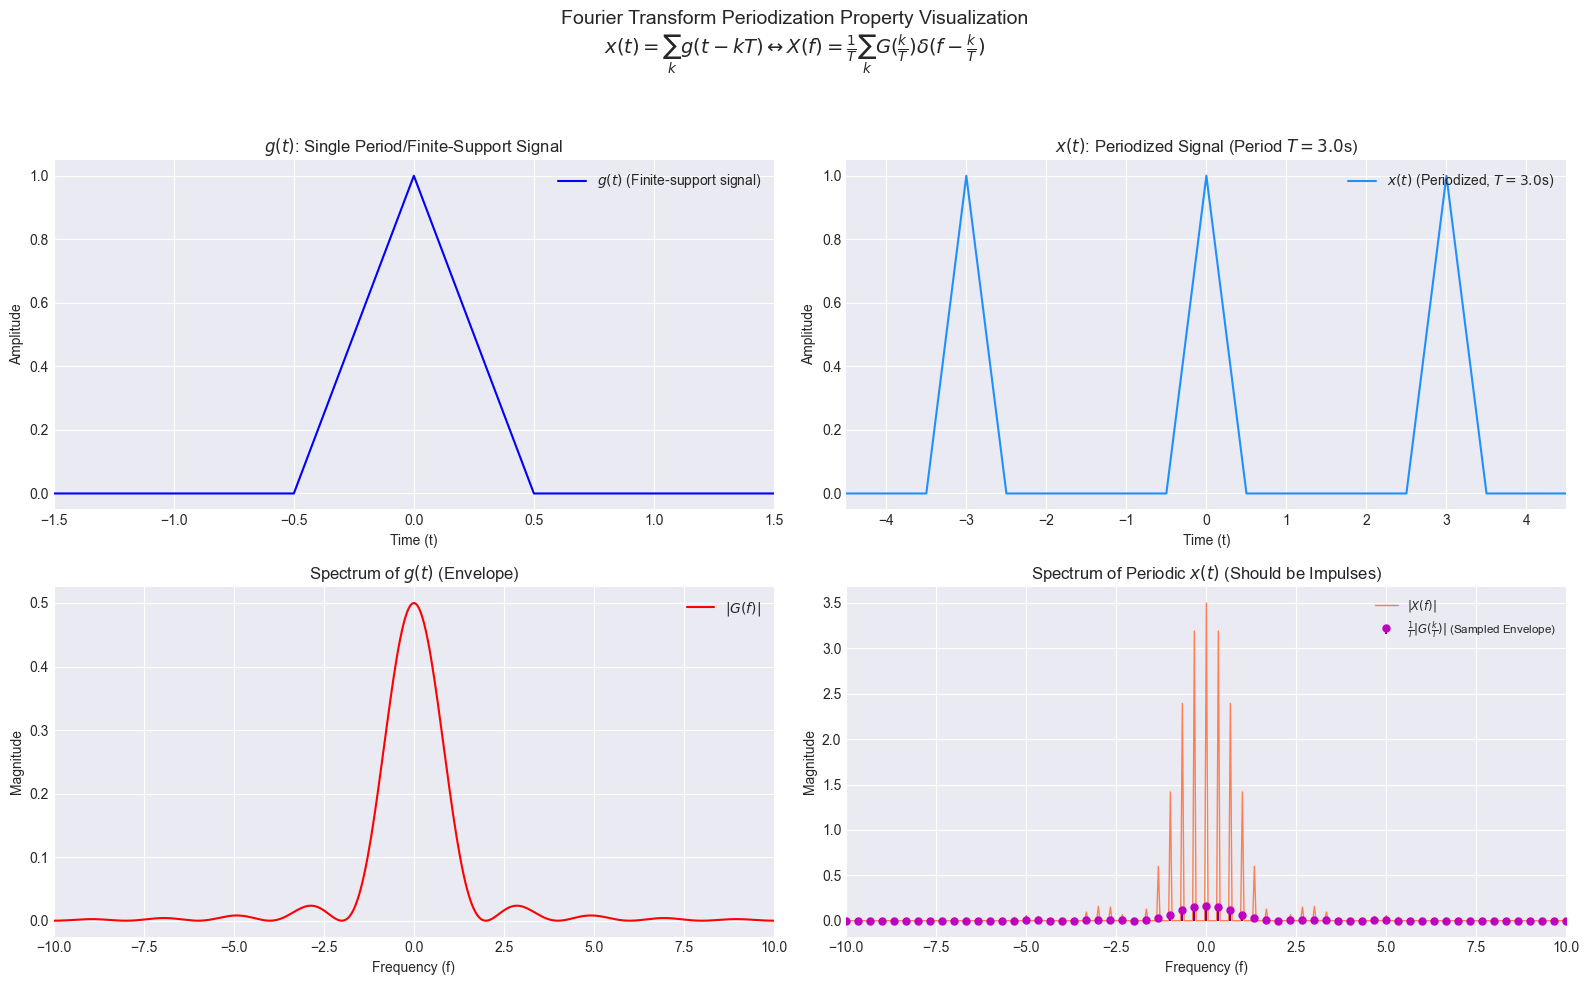

Notes on Periodization Visualization:
- g(t) is a triangular pulse of width 1.0 at the base.
- x(t) is g(t) periodized with period T = 3.0s.
- |G(f)| is the spectrum of the single pulse g(t).
- |X(f)| is the spectrum of the periodic signal x(t). It should consist of sharp peaks (approximating Dirac deltas).
- The purple stems on the |X(f)| plot show (1/T) * |G(k/T)|.
- These stems should align with the peaks of |X(f)|, demonstrating the property.
- The more periods of x(t) included in the FFT, the sharper the peaks in |X(f)| will be.


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Finite-Support Signal g(t) ---
# Example: A triangular pulse centered at 0
# g(t) = A * (1 - |t|/W) for |t| <= W, and 0 otherwise
def triangular_pulse(t_vec, amplitude, width_at_base):
    """Defines a triangular pulse centered at 0."""
    W = width_at_base / 2.0 # Half-width from center to edge
    pulse = amplitude * (1 - np.abs(t_vec) / W)
    pulse[np.abs(t_vec) > W] = 0
    return pulse

A_g = 1.0  # Amplitude of the triangular pulse g(t)
W_g_base = 1.0  # Full width of the base of the triangular pulse g(t)

# Period for periodization
T_period = 3.0 # Period of x(t). Choose T_period > W_g_base for non-overlapping g(t) in x(t)
                # or T_period < W_g_base for overlapping. Let's start with non-overlapping.

# Time domain parameters
Fs_time = 1000  # Sampling frequency
dt = 1.0 / Fs_time # Time step
# Ensure the time window is large enough for several periods of x(t)
# and to capture g(t) well for its FT.
num_periods_to_show = 3
t_max_abs = (num_periods_to_show + 0.5) * T_period
t = np.arange(-t_max_abs, t_max_abs, dt) # Time vector
N_time = len(t)

# Define g(t)
g_t = triangular_pulse(t, A_g, W_g_base)

# --- 2. Create Periodized Signal x(t) ---
# x(t) = sum_{k} g(t - k*T_period)
x_t_periodic = np.zeros_like(t)
# Sum a few periods for visualization and FFT.
# For FFT, the more periods included, the sharper the spectral lines will be.
# The range of k should cover the t vector.
k_min = int(np.floor(t[0] / T_period)) - 1 # One extra on each side
k_max = int(np.ceil(t[-1] / T_period)) + 1

for k_idx in range(k_min, k_max + 1):
    # Create a shifted version of g(t) for each k
    # g(t) is defined around t=0. g(t - k*T) means its center moves to k*T.
    # So, we evaluate triangular_pulse at (t - k*T_period)
    g_shifted = triangular_pulse(t - k_idx * T_period, A_g, W_g_base)
    x_t_periodic += g_shifted


# --- 3. Compute Numerical Fourier Transforms ---
# FT of g(t) -> G(f)
G_f_complex = np.fft.fft(g_t) * dt
# FT of x(t) -> X(f)
X_f_periodic_complex = np.fft.fft(x_t_periodic) * dt

# Create frequency vector
freq = np.fft.fftfreq(N_time, d=dt)

# Shift for plotting
G_f_complex_shifted = np.fft.fftshift(G_f_complex)
X_f_periodic_complex_shifted = np.fft.fftshift(X_f_periodic_complex)
freq_shifted = np.fft.fftshift(freq)

# Magnitudes
G_f_magnitude = np.abs(G_f_complex_shifted)
X_f_periodic_magnitude = np.abs(X_f_periodic_complex_shifted)

# --- 4. Visualization ---
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle(r'Fourier Transform Periodization Property Visualization' + '\n' +
             r'$x(t) = \sum_k g(t-kT) \leftrightarrow X(f) = \frac{1}{T}\sum_k G(\frac{k}{T})\delta(f-\frac{k}{T})$',
             fontsize=14)

# Plot g(t)
axs[0,0].plot(t, g_t, label='$g(t)$ (Finite-support signal)', color='blue')
axs[0,0].set_title('$g(t)$: Single Period/Finite-Support Signal')
axs[0,0].set_xlabel('Time (t)'); axs[0,0].set_ylabel('Amplitude'); axs[0,0].grid(True); axs[0,0].legend()
axs[0,0].set_xlim([-W_g_base * 1.5, W_g_base * 1.5])

# Plot x(t)
axs[0,1].plot(t, x_t_periodic, label=f'$x(t)$ (Periodized, $T={T_period}$s)', color='dodgerblue')
axs[0,1].set_title(f'$x(t)$: Periodized Signal (Period $T={T_period}$s)')
axs[0,1].set_xlabel('Time (t)'); axs[0,1].set_ylabel('Amplitude'); axs[0,1].grid(True); axs[0,1].legend()
axs[0,1].set_xlim([-num_periods_to_show*T_period/2, num_periods_to_show*T_period/2])

# Plot |G(f)| - Spectrum of g(t)
axs[1,0].plot(freq_shifted, G_f_magnitude, label='$|G(f)|$', color='red')
axs[1,0].set_title('Spectrum of $g(t)$ (Envelope)')
axs[1,0].set_xlabel('Frequency (f)'); axs[1,0].set_ylabel('Magnitude'); axs[1,0].grid(True); axs[1,0].legend()
# Analytical FT of triangular pulse A*(1-|t|/W_half) is A*W_half * sinc^2(f*W_half)
# W_half for our definition is W_g_base/2
freq_plot_limit_g = 5.0 / (W_g_base/2.0) # Show a few lobes of sinc^2
axs[1,0].set_xlim([-freq_plot_limit_g, freq_plot_limit_g])

# Plot |X(f)| - Spectrum of x(t)
axs[1,1].plot(freq_shifted, X_f_periodic_magnitude, label='$|X(f)|$', color='coral', linewidth=1.0)
axs[1,1].set_title(f'Spectrum of Periodic $x(t)$ (Should be Impulses)')
axs[1,1].set_xlabel('Frequency (f)'); axs[1,1].set_ylabel('Magnitude'); axs[1,1].grid(True);

# Overlay scaled samples of |G(f)|
# Frequencies for impulses: f_k = k/T_period
fundamental_freq = 1.0 / T_period
max_harmonic_k = int(np.floor(freq_plot_limit_g / fundamental_freq))
harmonic_freqs = np.arange(-max_harmonic_k, max_harmonic_k + 1) * fundamental_freq

# Interpolate |G(f)| at these harmonic_freqs
# We need to use the unshifted G_f_complex and freq for interpolation if G_f_magnitude is from shifted.
# Or interpolate directly from G_f_magnitude and freq_shifted.
G_samples_mag = np.interp(harmonic_freqs, freq_shifted, G_f_magnitude)
scaled_G_samples_mag = (1.0 / T_period) * G_samples_mag

# Plot these as stems
markerline, stemlines, baseline = axs[1,1].stem(
    harmonic_freqs,
    scaled_G_samples_mag,
    linefmt='purple', markerfmt='mo', basefmt=" ",
    label=r'$\frac{1}{T}|G(\frac{k}{T})|$ (Sampled Envelope)'
)
plt.setp(stemlines, 'linewidth', 1.5)
plt.setp(markerline, 'markersize', 5)

axs[1,1].legend(fontsize='small')
axs[1,1].set_xlim([-freq_plot_limit_g, freq_plot_limit_g]) # Same limit as |G(f)| for comparison

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("Notes on Periodization Visualization:")
print(f"- g(t) is a triangular pulse of width {W_g_base} at the base.")
print(f"- x(t) is g(t) periodized with period T = {T_period}s.")
print(f"- |G(f)| is the spectrum of the single pulse g(t).")
print(f"- |X(f)| is the spectrum of the periodic signal x(t). It should consist of sharp peaks (approximating Dirac deltas).")
print(f"- The purple stems on the |X(f)| plot show (1/T) * |G(k/T)|.")
print(f"- These stems should align with the peaks of |X(f)|, demonstrating the property.")
print(f"- The more periods of x(t) included in the FFT, the sharper the peaks in |X(f)| will be.")


Sampling Property Visualization

<>:160: SyntaxWarning: invalid escape sequence '\p'
<>:160: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Alessio\AppData\Local\Temp\ipykernel_4260\2493261588.py:160: SyntaxWarning: invalid escape sequence '\p'
  axs[1,1].axvline(Fs_sample/2, color='gray', linestyle=':', linewidth=1, label='$\pm F_s/2$')


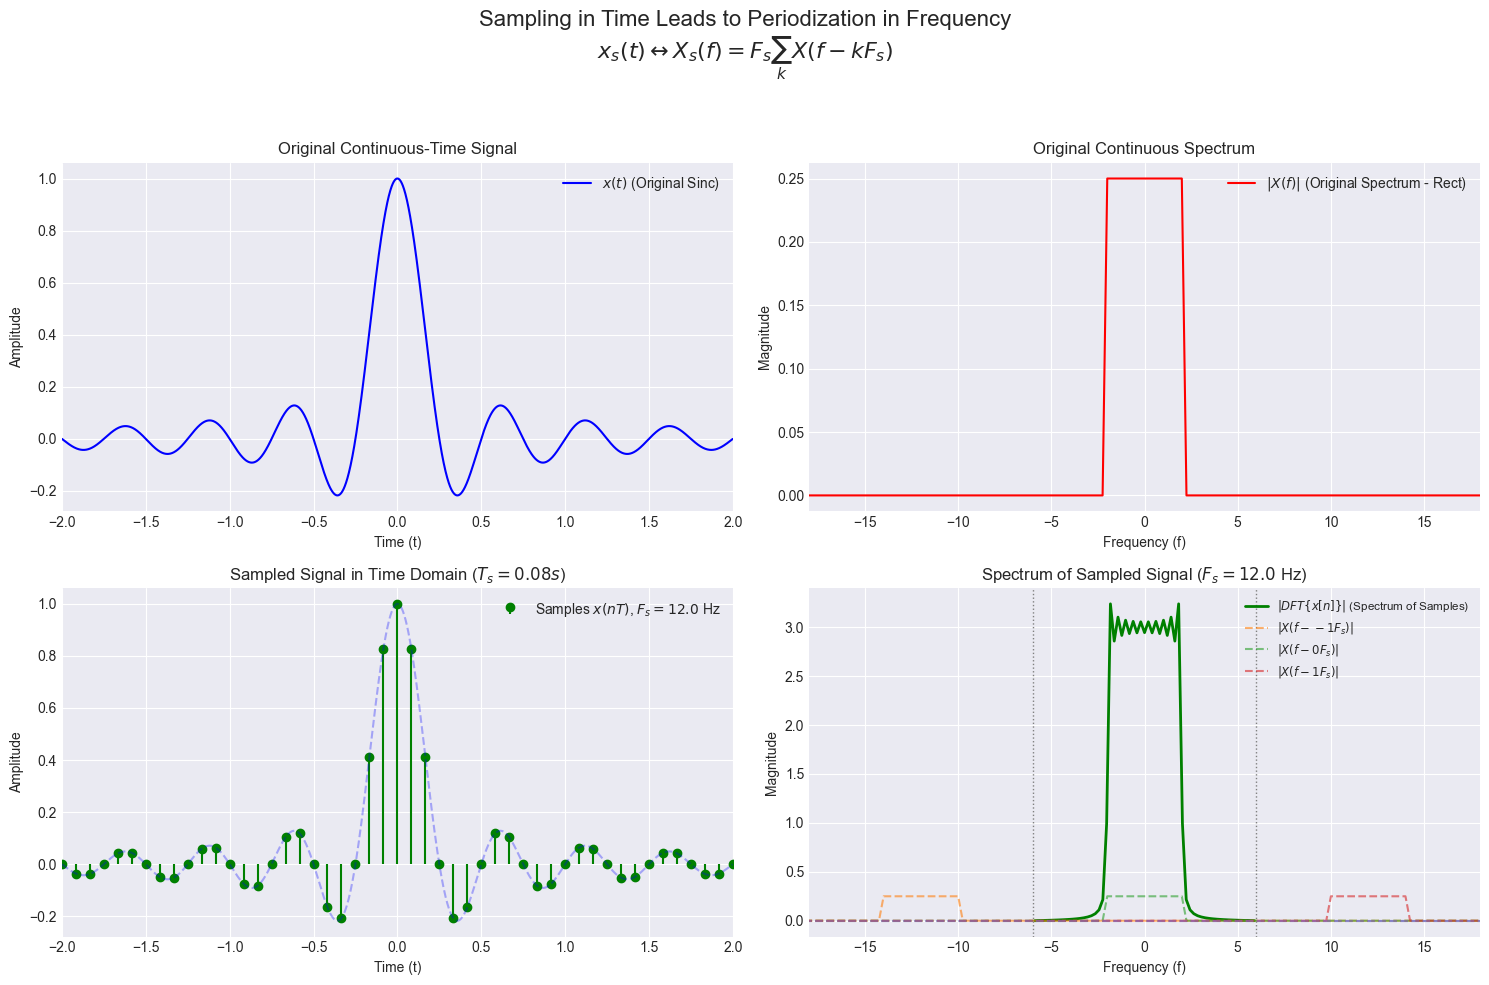

Signal bandwidth B_sig = 2.0 Hz.
Nyquist rate = 2 * B_sig = 4.0 Hz.
Sampling frequency Fs = 12.0 Hz (Chosen > Nyquist rate).

Key takeaway: Sampling x(t) in time creates periodic replicas of its spectrum X(f) in frequency.
The DFT of the samples x[n] shows one period of this replicated spectrum.
The replicas are centered at multiples of Fs.


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# --- Helper function for sinc pulse (numpy's definition) ---
# np.sinc(x) is sin(pi*x)/(pi*x)
def sinc_pulse(t, amplitude, bandwidth_B_param):
    """Defines a sinc pulse: A * sinc(2*B*t).
       Its FT is (A/2B) * rect(f/(2B))
    """
    return amplitude * np.sinc(2 * bandwidth_B_param * t)

# --- Helper function for rectangular spectrum ---
def rect_spectrum(f, amplitude_at_dc, bandwidth_B_param):
    """Defines a rectangular spectrum: (A_dc) * rect(f / (2B)).
       Non-zero from -B to B.
    """
    return amplitude_at_dc * np.where(np.abs(f) <= bandwidth_B_param, 1.0, 0.0)

# --- Signal Parameters ---
A_sig = 1.0  # Amplitude of the sinc pulse in time
B_sig = 2.0  # Bandwidth of the signal (X(f) is non-zero from -B_sig to B_sig Hz)
             # This B_sig is the 'B' in rect(f/(2B))

# Time domain parameters for "continuous" visualization
Fs_continuous_vis = 1000 # High sampling rate for smooth plotting of x(t) and X(f)
dt_continuous_vis = 1.0 / Fs_continuous_vis
t_max_vis = 4.0 / B_sig # Show a few lobes of sinc for x(t)
t_vis = np.arange(-t_max_vis, t_max_vis, dt_continuous_vis)

# Original continuous-time signal x(t)
x_t_continuous = sinc_pulse(t_vis, A_sig, B_sig)

# Analytical Fourier Transform X(f) of x(t)
# FT of A*sinc(2Bt) is (A/2B)*rect(f/(2B))
X_f_amplitude_at_dc = A_sig / (2 * B_sig)
# Frequency vector for plotting X(f)
N_vis_time = len(t_vis)
freq_vis_continuous = np.fft.fftfreq(N_vis_time, d=dt_continuous_vis)
freq_vis_continuous_shifted = np.fft.fftshift(freq_vis_continuous)
X_f_continuous_mag = rect_spectrum(freq_vis_continuous_shifted, X_f_amplitude_at_dc, B_sig)

# --- Sampling Parameters ---
# Choose Fs well above Nyquist rate (2*B_sig) to clearly see separate replicas
Fs_sample = 3.0 * (2 * B_sig) # e.g., 3 times the Nyquist rate
T_sample = 1.0 / Fs_sample

# Generate discrete time samples x[n] = x(nT)
# Ensure the sampled time window is reasonably wide to capture the signal
num_samples_half_window = int(np.ceil(t_max_vis / T_sample)) + 5 # A few extra samples
n_discrete = np.arange(-num_samples_half_window, num_samples_half_window + 1)
t_discrete = n_discrete * T_sample
x_samples = sinc_pulse(t_discrete, A_sig, B_sig)

# --- Compute DFT of the samples ---
# This DFT will approximate one period of X_s(f)
# The magnitude of the DFT of x[n] is proportional to |X_s(f)|
X_dft_complex = np.fft.fft(x_samples)
freq_dft = np.fft.fftfreq(len(x_samples), d=T_sample)

X_dft_complex_shifted = np.fft.fftshift(X_dft_complex)
freq_dft_shifted = np.fft.fftshift(freq_dft)

# Scale the DFT magnitude.
# For x_s(t) = sum x(nT)delta(t-nT), FT{x_s(t)} = X_s(f) = Fs * sum X(f-kFs)
# The DFT X_k = sum x[n]exp(-j2pikn/N).
# For a large N, X_k approx (1/T_sample) * X_s(f_k_dft) * (N*T_sample) / N = X_s(f_k_dft)
# No, DFT_k = sum x_n e^(-j2 pi k n / N)
# X_s(f) = sum_n x(nT) e^(-j 2 pi f n T) -- this is DTFT definition if T=1
# For CTFT of impulse train: X_s(f) = sum_n x(nT) e^(-j 2 pi f n T)
# The DFT X_k is related to samples of X_s(f) at f = k/(N*T_sample).
# |DFT_k| should approximate |X_s(f_k)| * (1/Fs_sample) if X_s(f) is defined as FT of x_s(t)
# Let's scale the DFT magnitude to match the height of the replicas of X(f) scaled by Fs
# Height of X(f) is X_f_amplitude_at_dc. Replicas in X_s(f) are Fs * X(f).
# So peaks of X_s(f) should be Fs * X_f_amplitude_at_dc.
# The raw np.fft.fft output needs scaling.
# If x_s_approx(f) = sum x[n] T_s exp(-j2pif n T_s), then this is an approximation of X_s(f) / Fs
# So |FFT(x_samples) * T_sample| should approximate |X_s(f)| / Fs_sample
# Thus, |X_s(f)| approx |FFT(x_samples) * T_sample * Fs_sample| = |FFT(x_samples)|
# This scaling is often a point of confusion.
# Let's use the property: X_s(f) = Fs * sum X(f-kFs).
# The DFT computes X_k = sum x_n e^(-j 2 pi k n / N).
# These X_k are samples of the DTFT. The DTFT is X_s(f)/Fs if T=1.
# For visualization, let's scale the DFT output magnitude such that its peak matches the expected peak of X_s(f).
# Expected peak of X_s(f) is Fs_sample * X_f_amplitude_at_dc.
numerical_Xs_f_mag = np.abs(X_dft_complex_shifted) * T_sample # This scales it to be like X(f) in one period
                                                       # We want to show Fs * sum X(f-kFs)
                                                       # So, this should be scaled by Fs further for direct comparison with theory.
                                                       # Or, more simply, DFT of x[n] is periodized version of X(f)
numerical_Xs_f_mag_scaled = np.abs(X_dft_complex_shifted) # This is the common way to plot DFT magnitude
                                                        # It represents one period of sum X(f-kFs)
                                                        # (without the Fs scaling factor from the CTFT definition of X_s(f))

# --- Construct theoretical X_s(f) by summing replicas of X(f) ---
# X_s_theoretical_mag_sum_X = np.zeros_like(freq_vis_continuous_shifted)
# num_replicas_side = 3
# for k_rep in range(-num_replicas_side, num_replicas_side + 1):
#     X_f_shifted_replica = rect_spectrum(freq_vis_continuous_shifted - k_rep * Fs_sample,
#                                         X_f_amplitude_at_dc, B_sig)
#     X_s_theoretical_mag_sum_X += X_f_shifted_replica
# This sum_X is what the DFT of x[n] represents (one period of it).

# --- Visualization ---
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Sampling in Time Leads to Periodization in Frequency\n' +
             r'$x_s(t) \leftrightarrow X_s(f) = F_s \sum_k X(f-kF_s)$', fontsize=16)

# Plot original continuous signal x(t)
axs[0,0].plot(t_vis, x_t_continuous, label='$x(t)$ (Original Sinc)', color='blue')
axs[0,0].set_title('Original Continuous-Time Signal')
axs[0,0].set_xlabel('Time (t)'); axs[0,0].set_ylabel('Amplitude'); axs[0,0].grid(True); axs[0,0].legend()
axs[0,0].set_xlim([-t_max_vis, t_max_vis])

# Plot original continuous spectrum |X(f)|
axs[0,1].plot(freq_vis_continuous_shifted, X_f_continuous_mag, label='$|X(f)|$ (Original Spectrum - Rect)', color='red')
axs[0,1].set_title('Original Continuous Spectrum')
axs[0,1].set_xlabel('Frequency (f)'); axs[0,1].set_ylabel('Magnitude'); axs[0,1].grid(True); axs[0,1].legend()
axs[0,1].set_xlim([-Fs_sample * 1.5, Fs_sample * 1.5]) # Show some space around the replicas

# Plot sampled signal x_s(t) (represented by stems x[n])
axs[1,0].stem(t_discrete, x_samples, linefmt='green', markerfmt='go', basefmt=" ",
              label=f'Samples $x(nT)$, $F_s={Fs_sample:.1f}$ Hz')
axs[1,0].plot(t_vis, x_t_continuous, 'b--', alpha=0.3) # Show original envelope
axs[1,0].set_title(f'Sampled Signal in Time Domain ($T_s={T_sample:.2f}s$)')
axs[1,0].set_xlabel('Time (t)'); axs[1,0].set_ylabel('Amplitude'); axs[1,0].grid(True); axs[1,0].legend()
axs[1,0].set_xlim([-t_max_vis, t_max_vis])

# Plot spectrum of sampled signal |X_s(f)| (from DFT) and theoretical replicas
axs[1,1].plot(freq_dft_shifted, numerical_Xs_f_mag_scaled,
              label=r'$|DFT\{x[n]\}|$ (Spectrum of Samples)', color='green', linewidth=2)

# Plot the theoretical replicas to show they sum up to the DFT shape
# The DFT of x[n] = x(nT) is proportional to sum_k X(f - k*Fs)
# We need to plot sum_k |X(f - k*Fs)| (without the Fs scaling for this comparison)
X_s_theoretical_sum_mag = np.zeros_like(freq_vis_continuous_shifted)
num_replicas_plot = int(np.ceil(axs[1,1].get_xlim()[1] / Fs_sample)) + 1

for k_rep in range(-num_replicas_plot, num_replicas_plot + 1):
    # Create each replica X(f - k*Fs)
    replica_mag = rect_spectrum(freq_vis_continuous_shifted - k_rep * Fs_sample,
                                X_f_amplitude_at_dc, B_sig)
    axs[1,1].plot(freq_vis_continuous_shifted, replica_mag,
                  linestyle='--', alpha=0.6,
                  label=f'$|X(f-{k_rep}F_s)|$' if k_rep in [-1,0,1] else None) # Label a few
    X_s_theoretical_sum_mag += replica_mag


axs[1,1].set_title(f'Spectrum of Sampled Signal ($F_s={Fs_sample:.1f}$ Hz)')
axs[1,1].set_xlabel('Frequency (f)'); axs[1,1].set_ylabel('Magnitude')
axs[1,1].grid(True);
# Get handles and labels for combined legend
handles, labels = axs[1,1].get_legend_handles_labels()
# Remove duplicate labels if any (less critical here)
# by_label = dict(zip(labels, handles))
# axs[1,1].legend(by_label.values(), by_label.keys(), fontsize='small', loc='upper right')
axs[1,1].legend(fontsize='small', loc='upper right')

axs[1,1].set_xlim([-Fs_sample * 1.5, Fs_sample * 1.5])
axs[1,1].axvline(-Fs_sample/2, color='gray', linestyle=':', linewidth=1)
axs[1,1].axvline(Fs_sample/2, color='gray', linestyle=':', linewidth=1, label='$\pm F_s/2$')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print(f"Signal bandwidth B_sig = {B_sig} Hz.")
print(f"Nyquist rate = 2 * B_sig = {2*B_sig} Hz.")
print(f"Sampling frequency Fs = {Fs_sample} Hz (Chosen > Nyquist rate).")
print("\nKey takeaway: Sampling x(t) in time creates periodic replicas of its spectrum X(f) in frequency.")
print("The DFT of the samples x[n] shows one period of this replicated spectrum.")
print("The replicas are centered at multiples of Fs.")
